# Temperature Forecast Project

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
df=pd.read_csv('temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [4]:
df.shape

(7752, 25)

We have 7752 rows and 25 columns

In [5]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [6]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [7]:
df.sample(15)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7320     21.0  13-08-2017          28.3          24.5    61.674358   
1759     10.0  08-07-2014          28.4          21.7    47.590046   
5555      6.0  05-08-2016          35.8          26.8    45.011112   
6965     16.0  30-07-2017          30.4          24.1    56.630634   
5915     16.0  19-08-2016          32.0          25.7    57.786209   
7667     18.0  27-08-2017          26.0          18.7    59.202148   
5323     24.0  26-07-2016          31.7          26.3    69.788887   
2886     12.0  22-08-2014          28.4          20.5    61.903049   
1055      6.0  11-08-2013          34.0          24.2    44.144806   
4374     25.0  19-08-2015          30.9          25.5    53.548229   
6808      9.0  24-07-2017          27.2          25.0    56.700504   
5905      6.0  19-08-2016          32.5          27.8    54.044838   
4727      3.0  03-07-2016          25.6          21.6    61.539658   
6310     11.0  04-07-2017          31.7          23.3    35.320568   
5747     23.0  12-08-2016          35.7          27.2    50.640148   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7320    78.937065         26.685573         22.792441  9.357280   21.270837   
1759    88.393806         33.145943         24.059685  5.842475   64.542916   
5555    84.099594         35.265609         26.686012  6.069944   66.546971   
6965    86.866310         31.078815         24.694151  5.834267   63.976252   
5915    85.552383         31.284721         26.094704  5.813561   79.549700   
7667    91.690079         25.964584         20.867034  7.578692   63.928596   
5323    98.155876         29.087232         25.607779  8.481384   42.208830   
2886    93.030197         26.933248         23.136244  6.402001   17.444677   
1055    87.915855         34.768041         27.595440  6.335715   54.987433   
4374    78.881775         29.105332         25.367663  6.170833   16.974778   
6808    94.252388         32.831494         24.863953  5.144538  108.628584   
5905    80.812782         32.154752         26.809428  5.871741   56.445819   
4727    94.206345         25.581778         20.321347  8.553753   54.672803   
6310    82.122726         33.403088         24.328183  5.629282   61.892894   
5747    87.127403         33.865523         28.288317  5.866478  103.834910   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7320  ...    0.014836    0.000000    0.004064  37.5507  127.040   26.2980   
1759  ...    0.000000    0.528037    0.003252  37.4562  126.955  208.5070   
5555  ...    0.010318    0.001620    0.000000  37.5102  127.042   54.6384   
6965  ...    0.000000    0.000000    0.057603  37.4697  126.995   82.2912   
5915  ...    0.000000    0.000000    0.000000  37.4697  126.995   82.2912   
7667  ...    0.000000    0.000000    3.030345  37.4832  127.024   56.4448   
5323  ...    1.110942    0.426702    0.128060  37.5237  126.909   17.2956   
2886  ...    0.000000    0.000000    0.000000  37.5507  126.988  132.1180   
1055  ...    0.000000    0.000000    0.000000  37.5102  127.042   54.6384   
4374  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
6808  ...    0.000000    0.015551    0.000000  37.4967  126.826   50.9312   
5905  ...    0.000000    0.000000    0.000000  37.5102  127.042   54.6384   
4727  ...    0.015681    6.771511    7.982257  37.5776  127.058   33.3068   
6310  ...    0.000000    0.000000    0.000000  37.5372  127.085   28.7000   
5747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
7320  0.5721      5062.609375       26.8       24.1  
1759  5.1782      5827.465332       32.4       23.2  
5555  0.1457      5275.238281       35.2       26.8  
6965  2.2579      5424.245117       25.5       23.2  
5915  2.2579      4790.760742       33.4       25.4  
7667  1.2313      4554.502441       28.4       18.3  
5323  0.2

In [8]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [9]:
#To see columns in a list
df.columns.to_list()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [10]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Here, we can see that except "Date" feature all are having float datatype.

# Checking Null Values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [12]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Here, we can see that null values are present.

<Axes: >

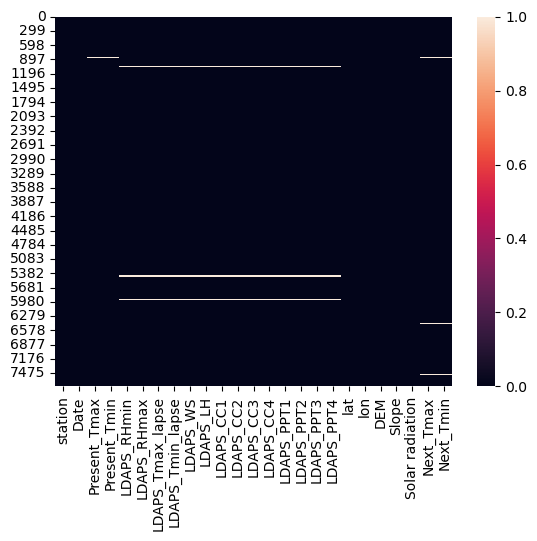

In [13]:
sns.heatmap(df.isnull())

In [14]:
# dropping all null values
df1=df.dropna()

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [16]:
df1.shape

(7588, 25)

In [17]:
df.shape

(7752, 25)

Here, we can see that 164 rows are having null values and it is dropped.  

In [18]:
df=df1

In [19]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<Axes: >

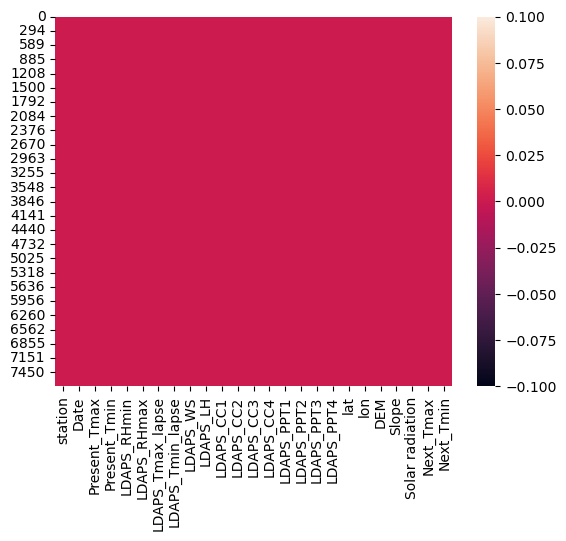

In [20]:
sns.heatmap(df.isnull())

Null values are removed.

In [21]:
#Changing Date column to datetime
df['Date'] = pd.to_datetime(df.Date)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7588 non-null   float64       
 1   Date              7588 non-null   datetime64[ns]
 2   Present_Tmax      7588 non-null   float64       
 3   Present_Tmin      7588 non-null   float64       
 4   LDAPS_RHmin       7588 non-null   float64       
 5   LDAPS_RHmax       7588 non-null   float64       
 6   LDAPS_Tmax_lapse  7588 non-null   float64       
 7   LDAPS_Tmin_lapse  7588 non-null   float64       
 8   LDAPS_WS          7588 non-null   float64       
 9   LDAPS_LH          7588 non-null   float64       
 10  LDAPS_CC1         7588 non-null   float64       
 11  LDAPS_CC2         7588 non-null   float64       
 12  LDAPS_CC3         7588 non-null   float64       
 13  LDAPS_CC4         7588 non-null   float64       
 14  LDAPS_PPT1        7588 n

In [23]:
#Separating Date column to Day, Month and year columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [24]:
#Now dropping Date column
df.drop(['Date'], axis=1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64


In [26]:
df.nunique()

station               25
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
Year                   5
Month                 12
Day                   21
dtype: int64

In [27]:
df["station"].value_counts() 

25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: station, dtype: int64

The "station" contains no.of each sattion i.e 1 to 25, it will make any impact in prediction the minimum and maximum Temperature. So, we will drop it.

In [28]:
df.drop(['station'], axis=1, inplace=True)

In [29]:
df.shape

(7588, 26)

# To check for duplicate datas

In [30]:
df.duplicated().sum()

0

In [31]:
df[df.duplicated()]

Empty DataFrame
Columns: [Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin, Year, Month, Day]
Index: []

[0 rows x 26 columns]

Here, we can see that no duplicates found.

In [32]:
#statisdical summary of numerical columns
df.describe()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
count   7588.000000   7588.000000  7588.000000  7588.000000       7588.000000   
mean      29.748366     23.195809    56.724969    88.360823         29.620128   
std        2.967401      2.400880    14.626559     7.199456          2.943496   
min       20.000000     11.300000    19.794666    58.936283         17.624954   
25%       27.800000     21.600000    45.960243    84.203724         27.673756   
50%       29.900000     23.400000    55.023199    89.784122         29.709537   
75%       32.000000     24.800000    67.115099    93.742725         31.711109   
max       37.600000     29.900000    98.524734   100.000153         38.542255   

       LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH    LDAPS_CC1    LDAPS_CC2  \
count       7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean          23.511786     7.094097    62.492606     0.368510     0.355528   
std            2.342579     2.177034    33.686158     0.262260     0.257922   
min           14.272646     2.882580   -13.603212     0.000000     0.000000   
25%           22.086820     5.675358    37.206201     0.146546     0.140324   
50%           23.758249     6.547838    56.898324     0.315706     0.311676   
75%           25.155660     8.028960    84.235666     0.574174     0.557164   
max           29.619342    21.857621   213.414006     0.967277     0.968353   

       ...          lat         lon          DEM        Slope  \
count  ...  7588.000000  7588.00000  7588.000000  7588.000000   
mean   ...    37.544792   126.99142    61.918136     1.259755   
std    ...     0.050428     0.07922    54.323529     1.372748   
min    ...    37.456200   126.82600    12.370000     0.098500   
25%    ...    37.510200   126.93700    28.700000     0.271300   
50%    ...    37.550700   126.99500    45.716000     0.618000   
75%    ...    37.577600   127.04200    59.832400     1.767800   
max    ...    37.645000   127.13500   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin         Year        Month  \
count      7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean       5343.724208    30.241526    22.910820  2014.991697     7.068134   
std         429.782561     3.111807     2.482256     1.410877     2.242389   
min        4329.520508    17.400000    11.300000  2013.000000     1.000000   
25%        5001.485717    28.200000    21.300000  2014.000000     7.000000   
50%        5441.987305    30.400000    23.100000  2015.000000     7.000000   
75%        5729.485840    32.600000    24.600000  2016.000000     8.000000   
max        5992.895996    38.900000    29.800000  2017.000000    12.000000   

               Day  
count  7588.000000  
mean     16.337375  
std       8.216880  
min       7.000000  
25%       8.000000  
50%      16.000000  
75%      24.000000  
max      31.000000  

[8 rows x 26 columns]

From the above, we can see that,
 
    1.The dataset looks perfect because it did not have any negative/invalid datas
    2.The counts are same, so missing/null values
    3.The mean and median(50%) have differences, so skewness is present.
    4.There is also huge difference between 75% and max in some columns,so outliers are present.   

# Data Visualization

Univariant Analysis

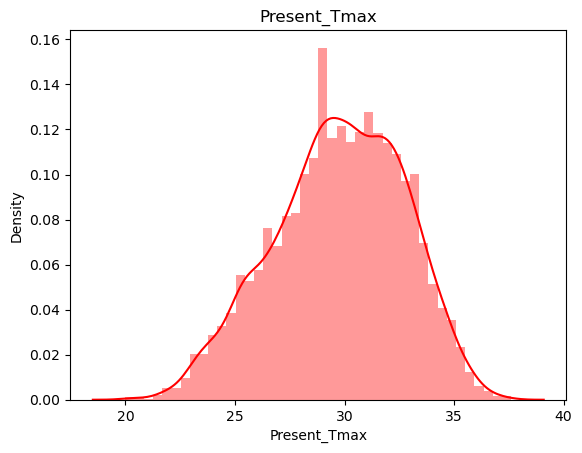

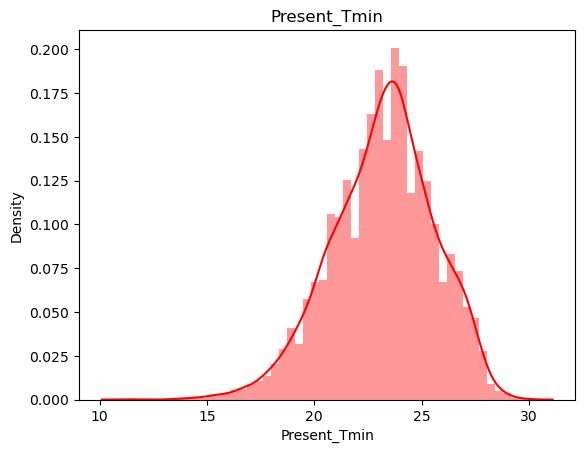

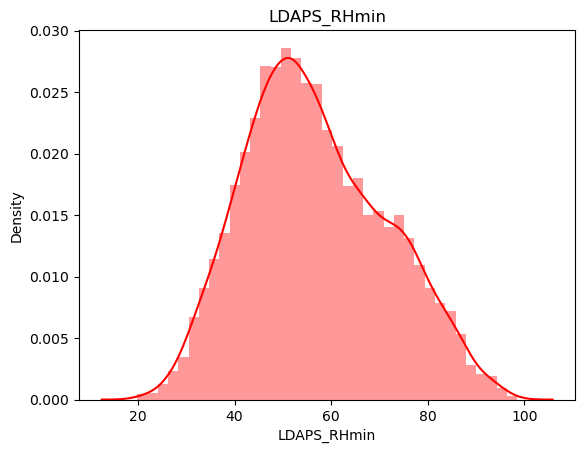

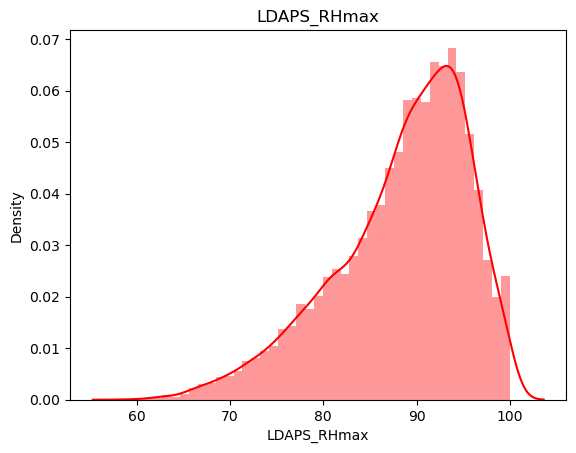

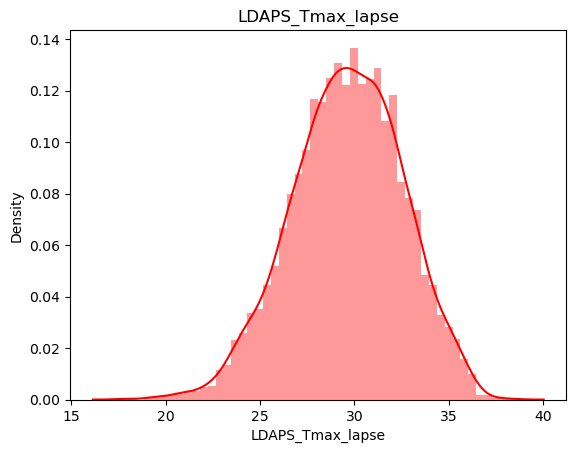

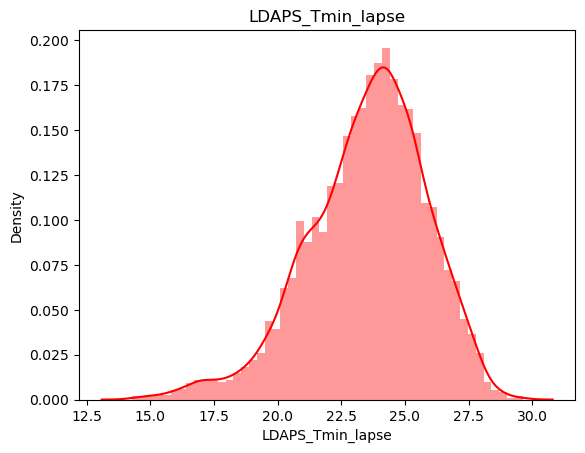

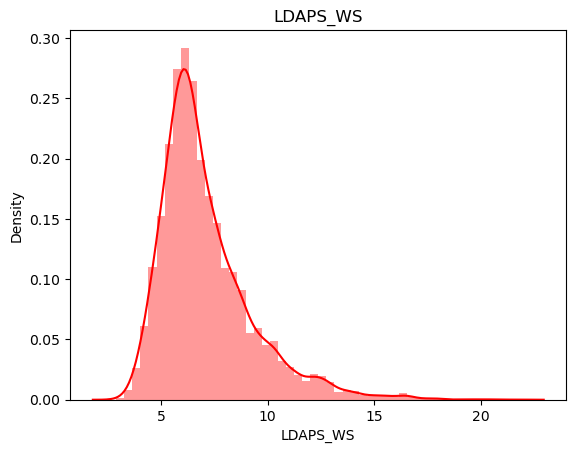

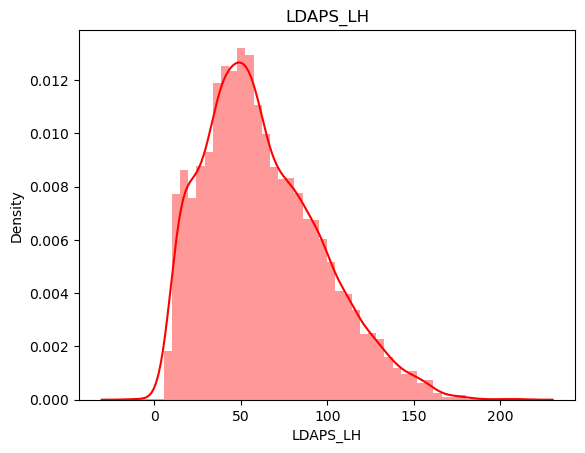

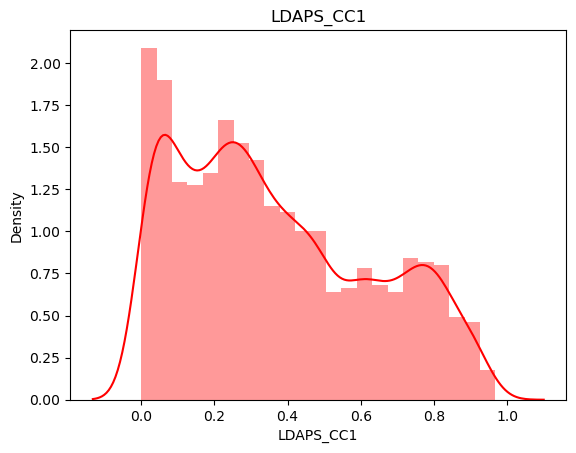

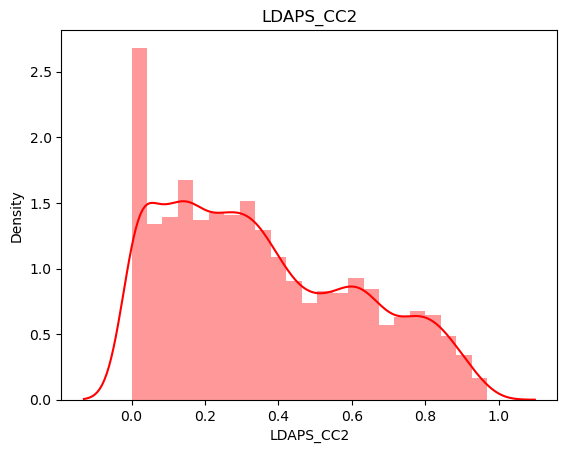

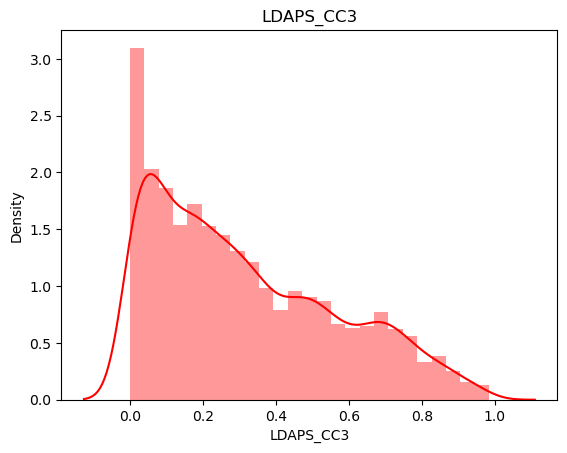

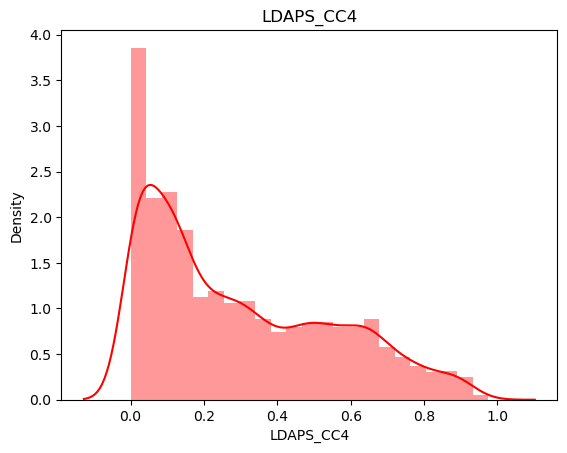

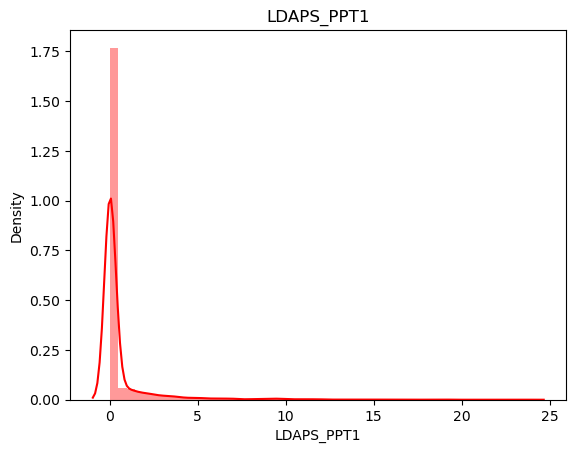

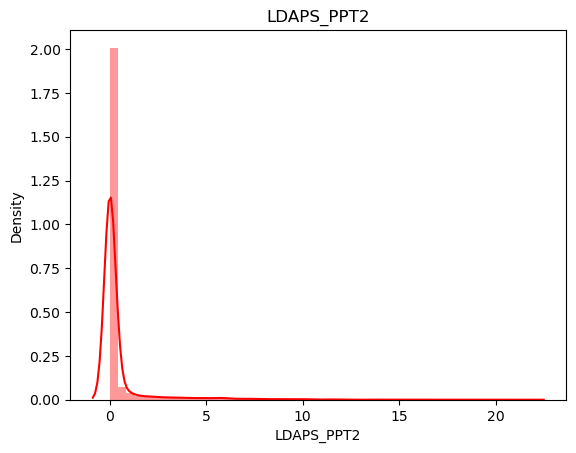

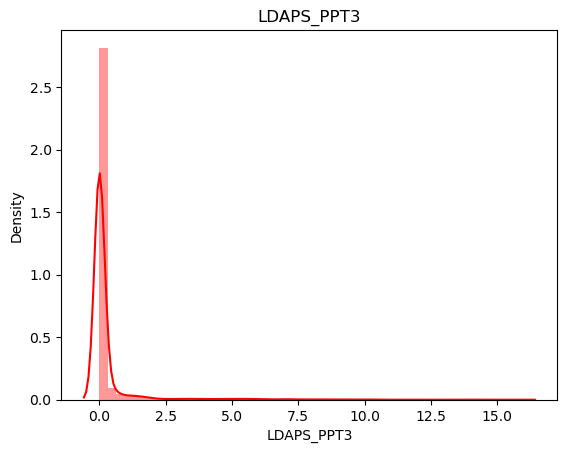

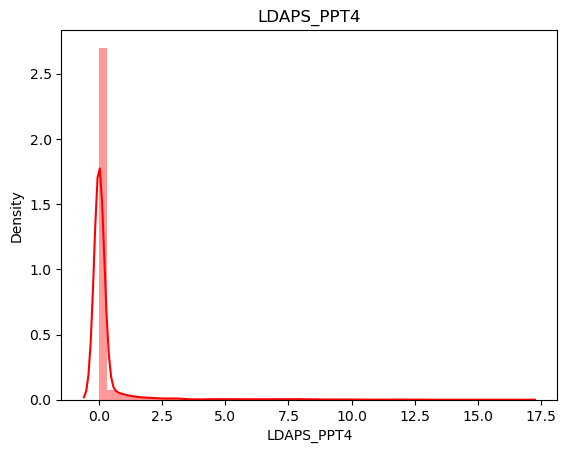

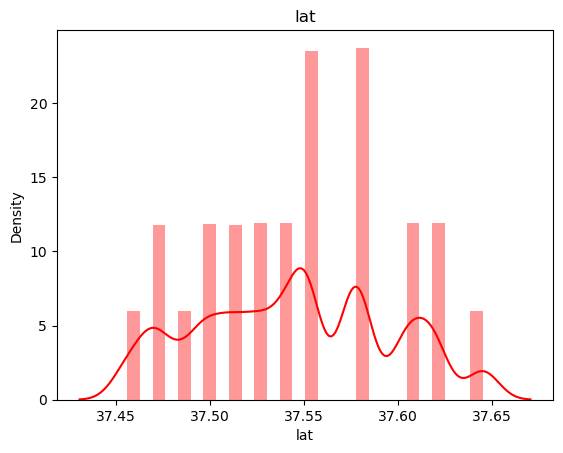

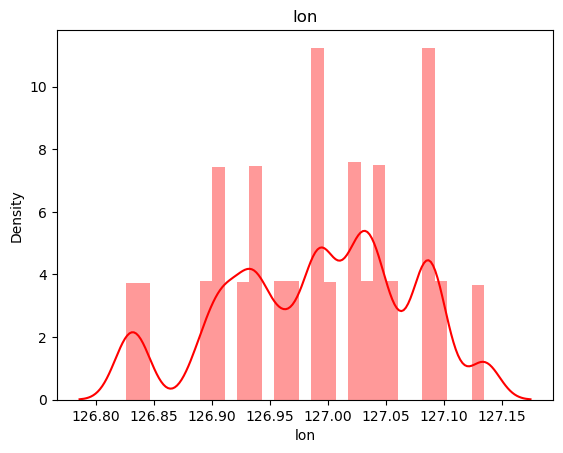

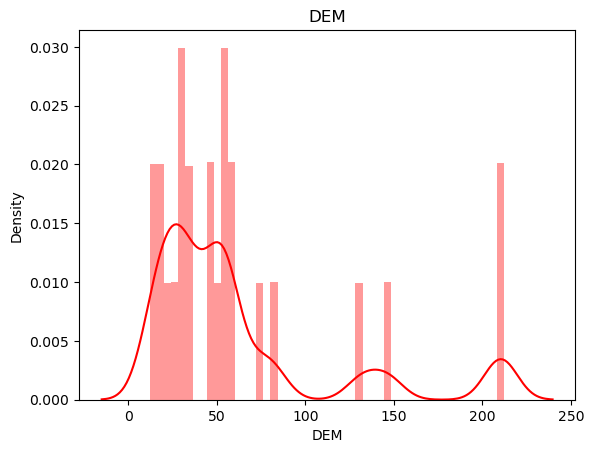

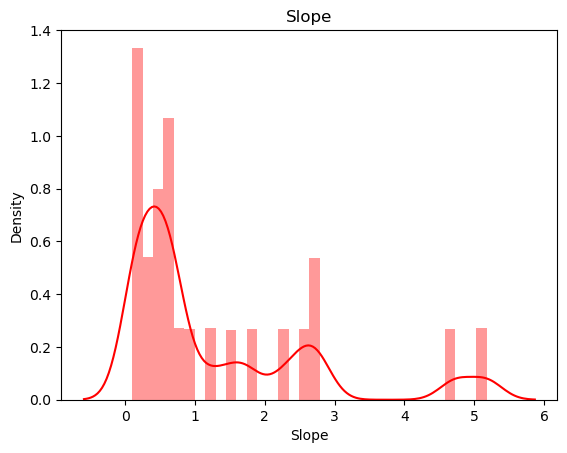

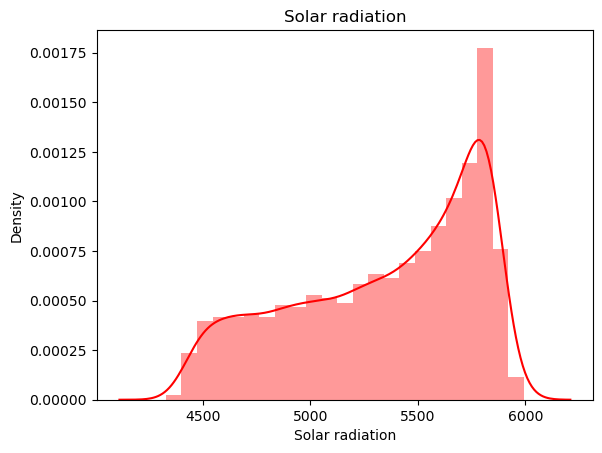

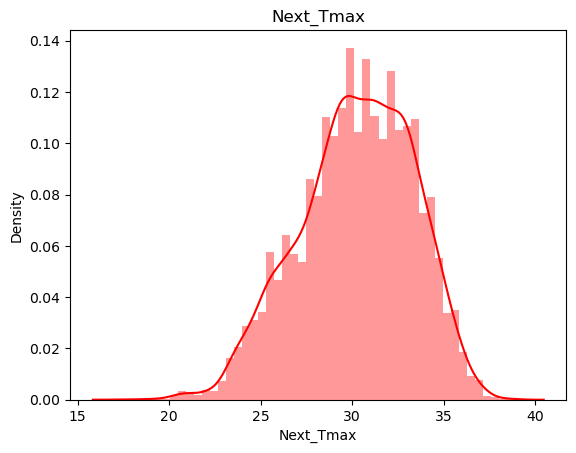

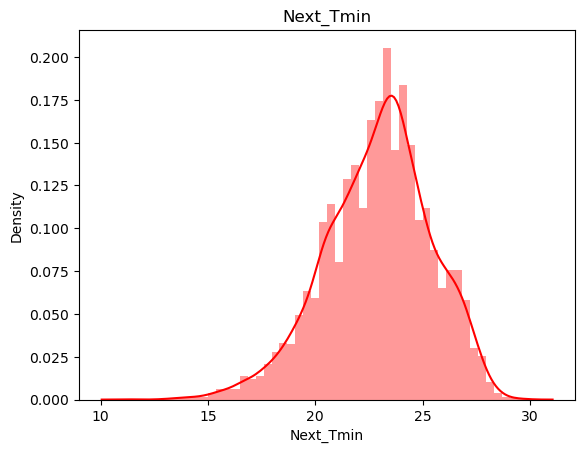

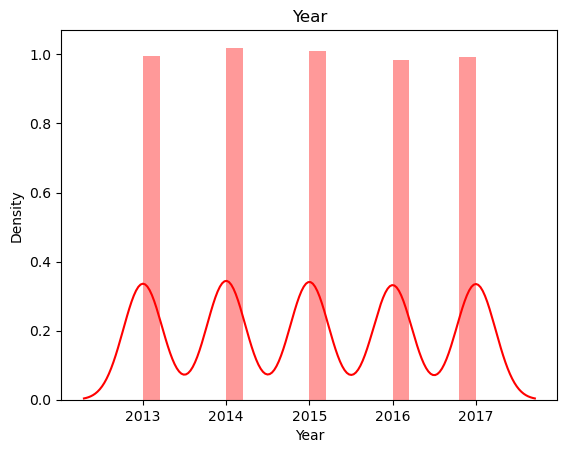

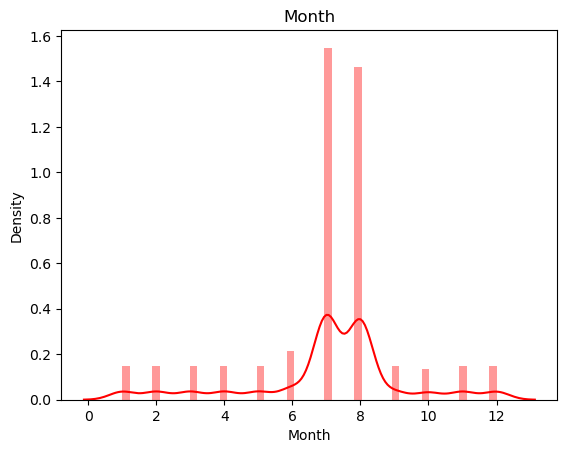

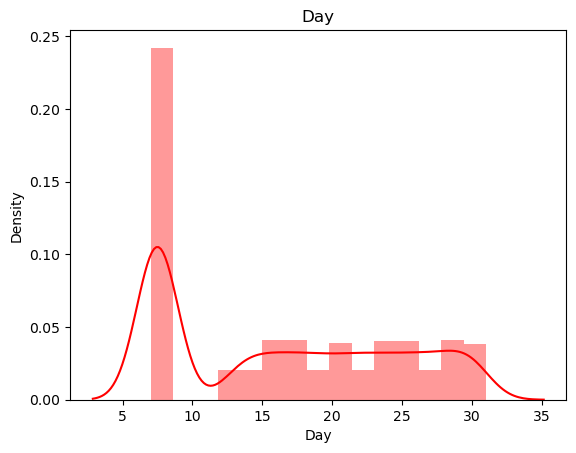

In [33]:
for i in df.columns :
    sns.distplot(df[i] , kde = True , color = 'red' )
    plt.title(i)
    plt.show()

array([[<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>]], dtype=object)

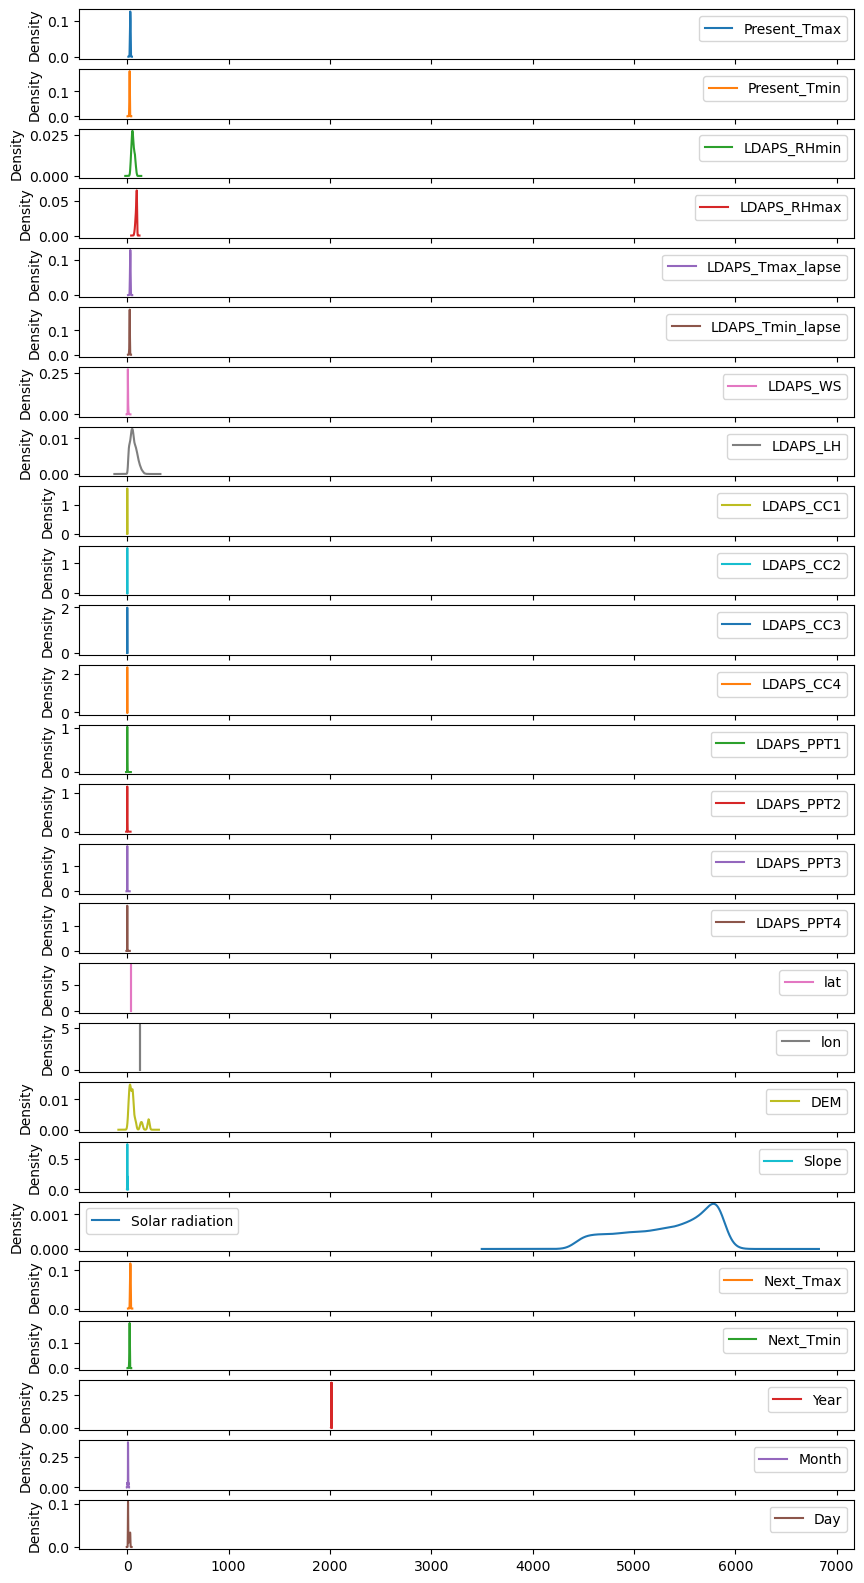

In [34]:
plot = df.plot(kind='kde', subplots=True, layout=(26,1), figsize=(10,20))
plot

Bivariant Analysis

In [35]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day'],
      dtype='object')

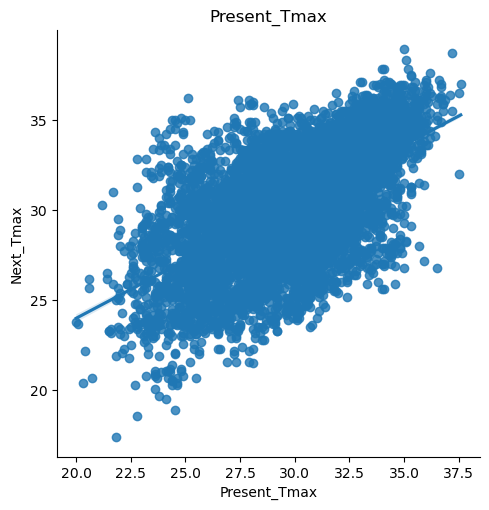

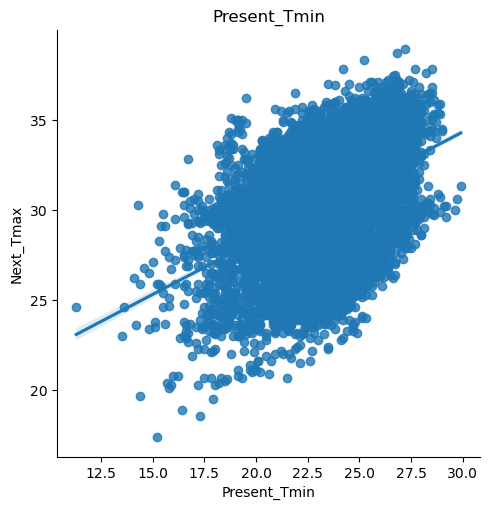

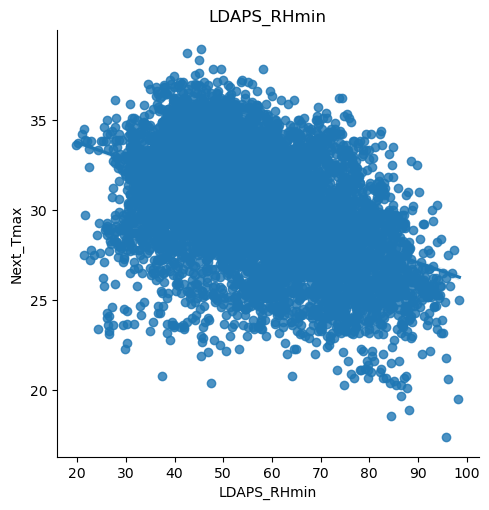

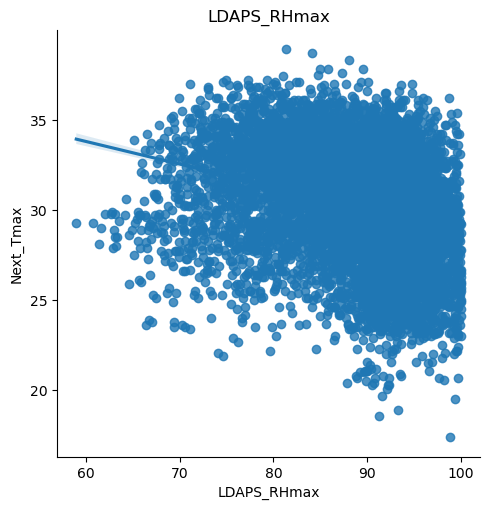

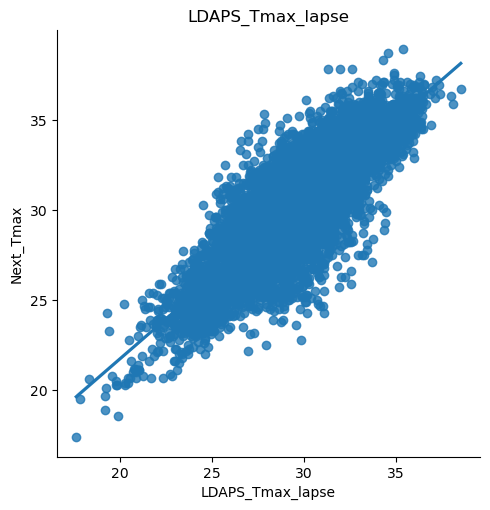

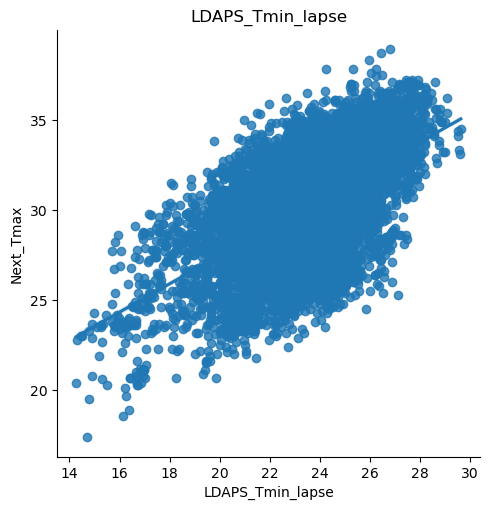

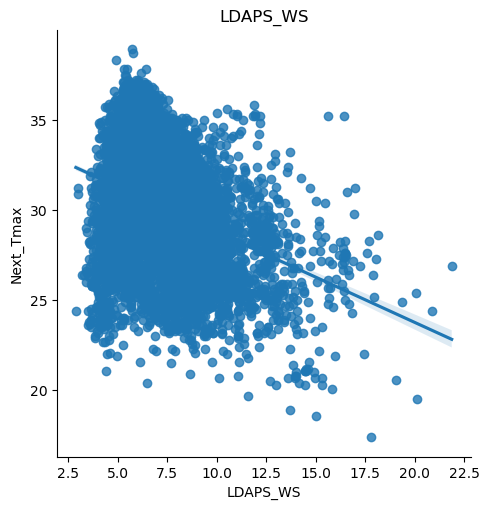

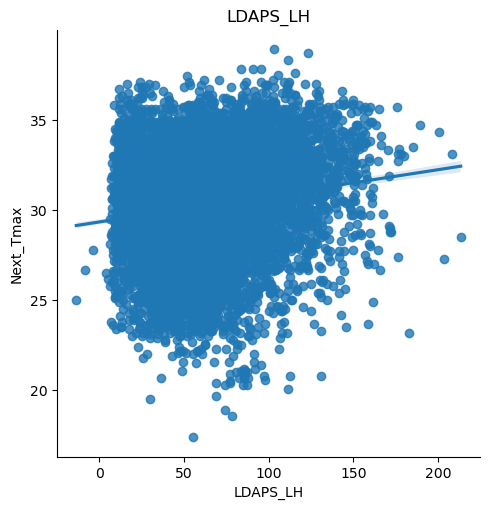

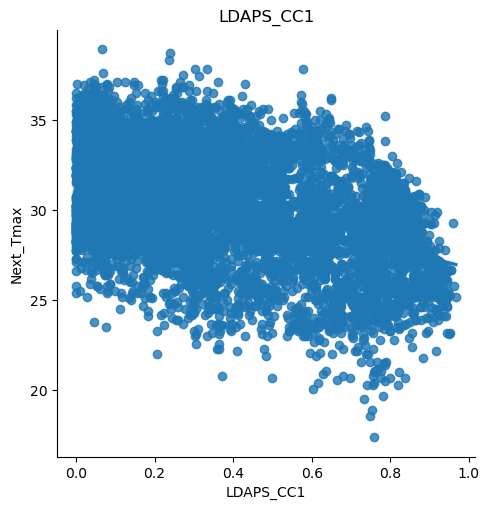

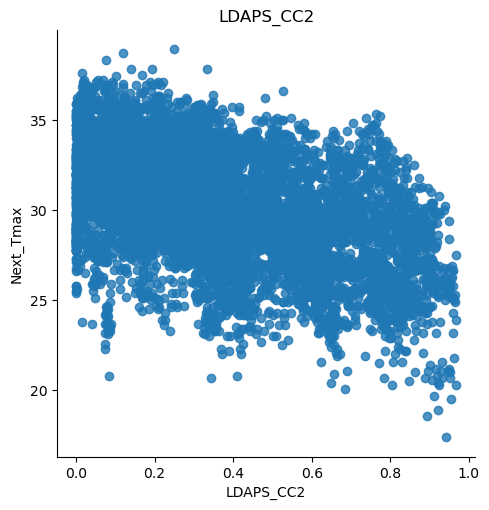

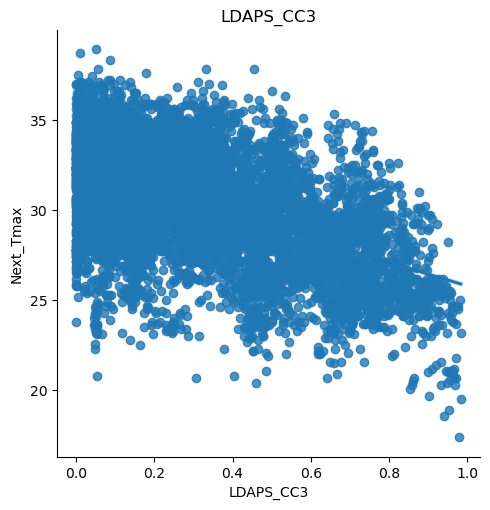

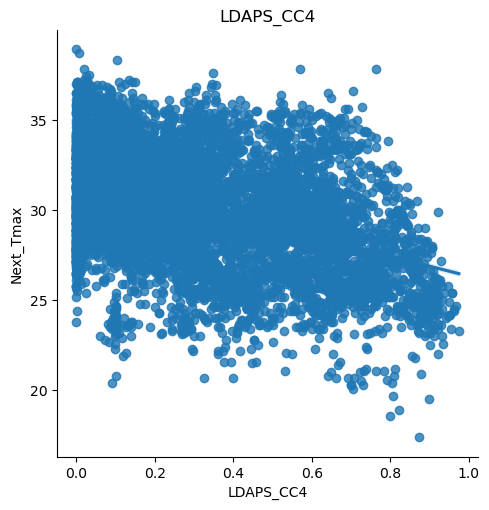

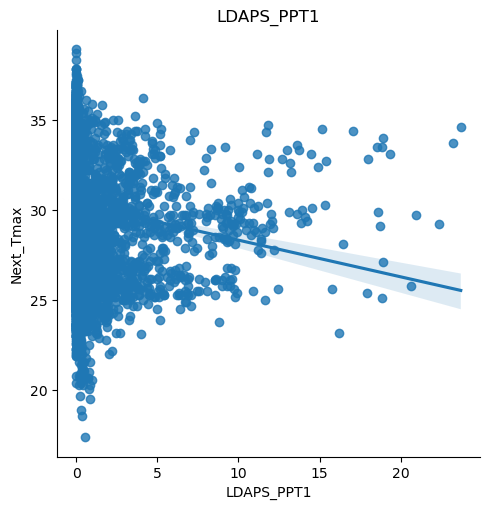

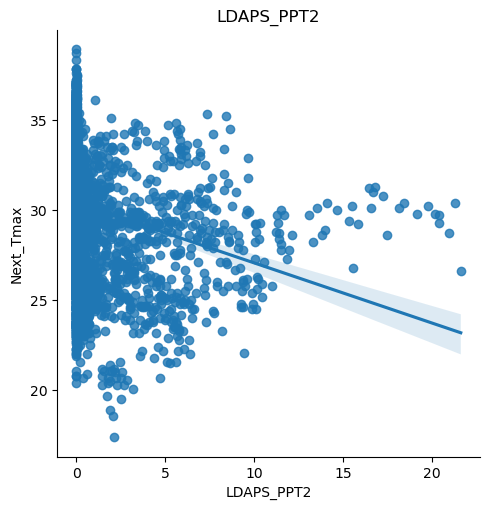

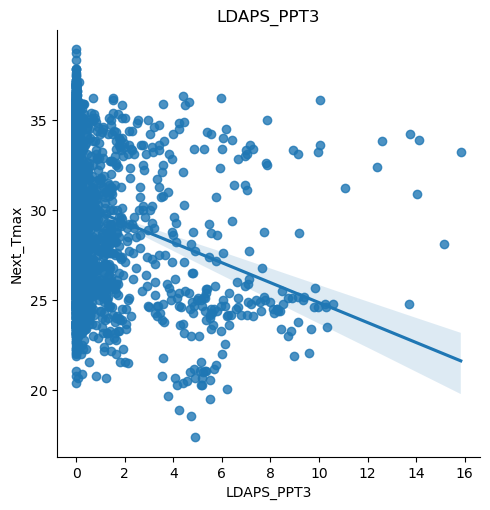

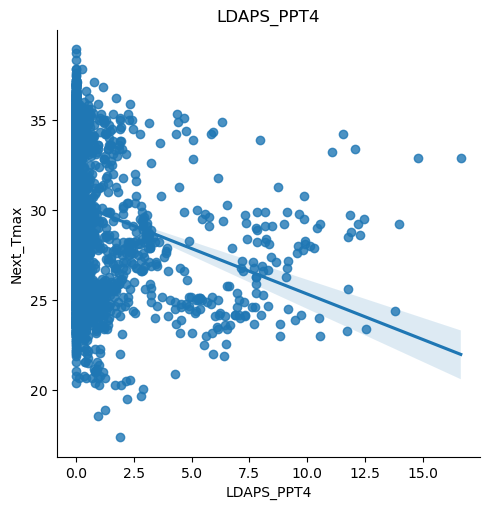

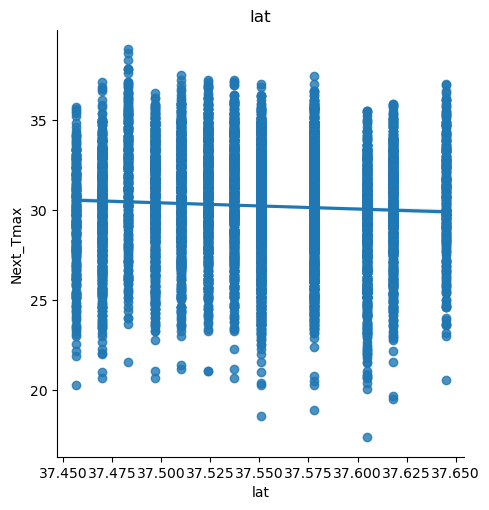

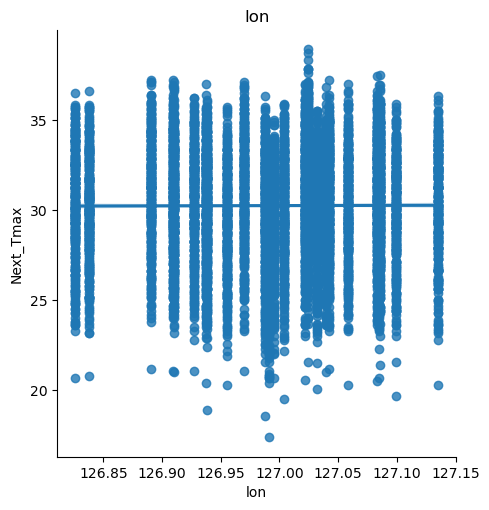

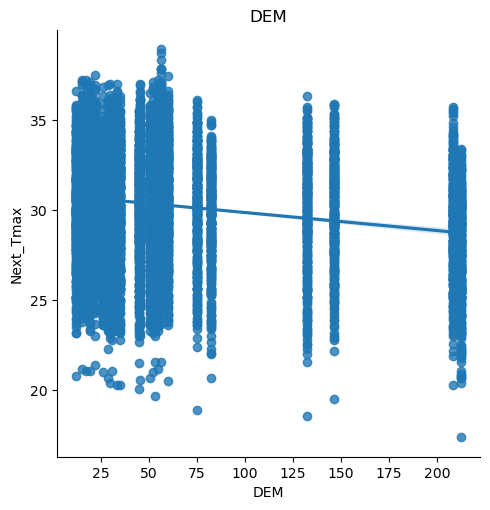

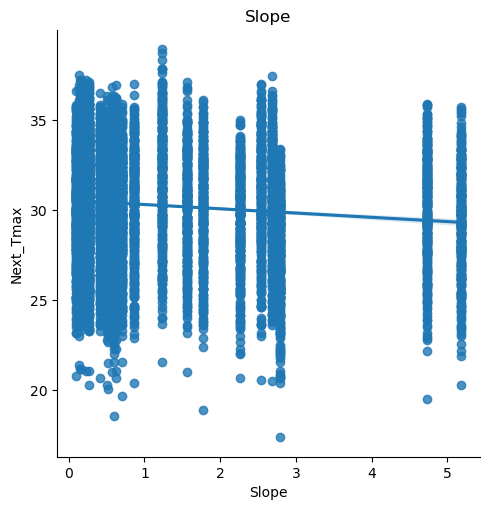

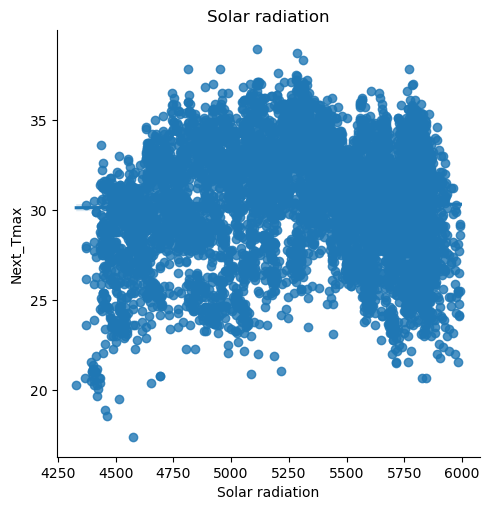

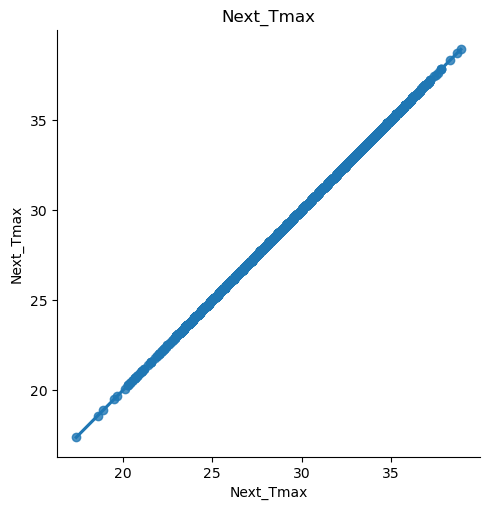

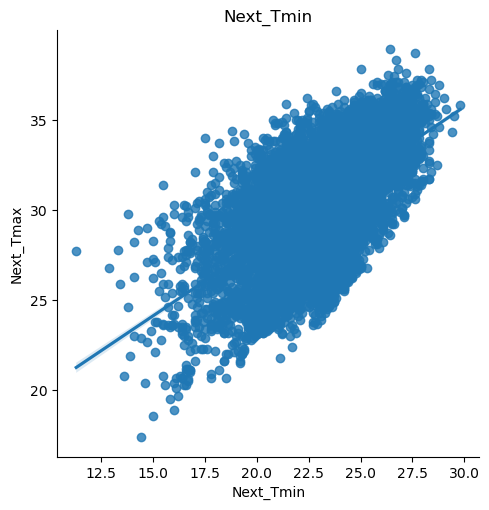

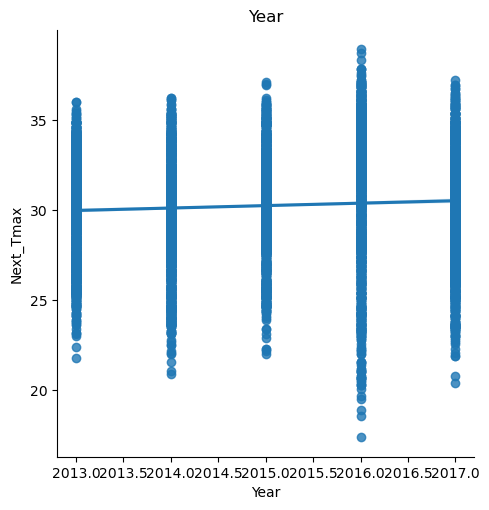

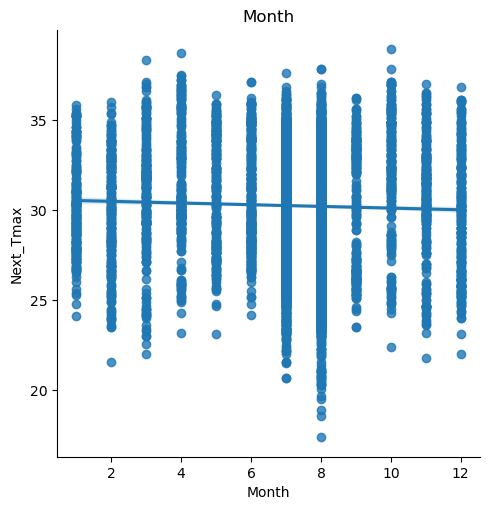

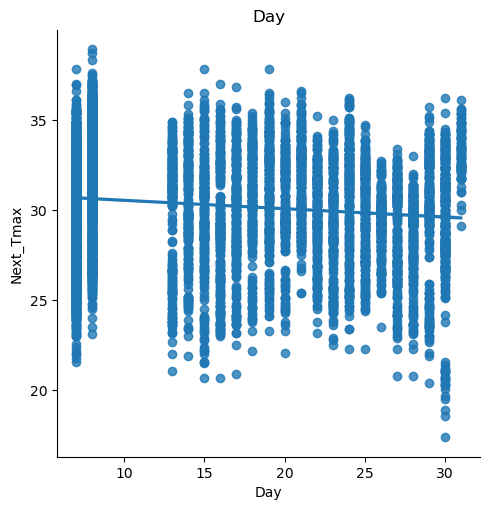

In [36]:
for i in df.columns :
    sns.lmplot(x=i, y='Next_Tmax', data =df)
    plt.xlabel(i)
    plt.ylabel("Next_Tmax")
    plt.title(i)
    plt.show()

From the above graphs, we can see that

    1)The next-day maximum air temperature "Next_Tmax" is directly propotional to "Present_Tmax", "Present_Tmin","LDAPS_Tmax_lapse" and "LDAPS_Tmin_lapse".
    2)The next-day maximum air temperature "Next_Tmax" is inversely propotional to "LDAPS_RHmin", "LDAPS_RHmax", "LDAPS_WS", 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3' and 'LDAPS_PPT4'

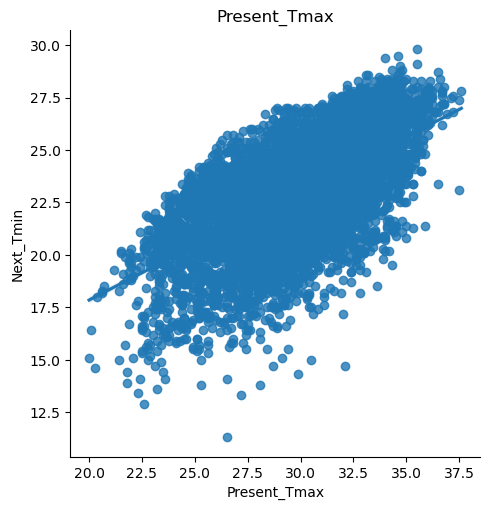

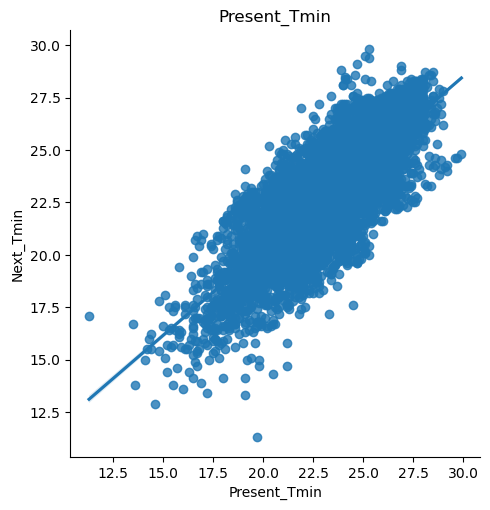

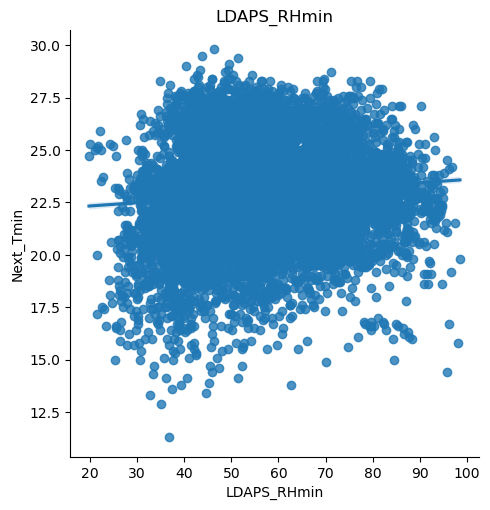

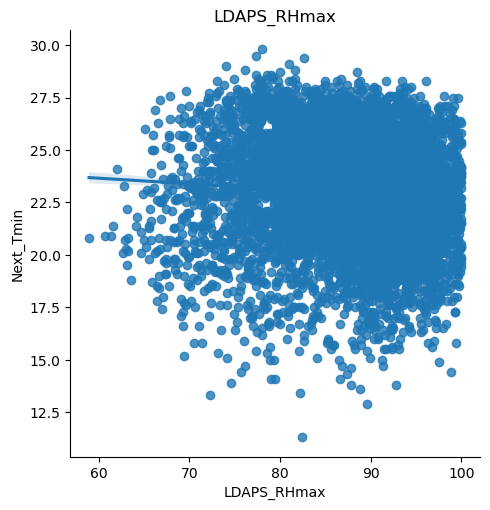

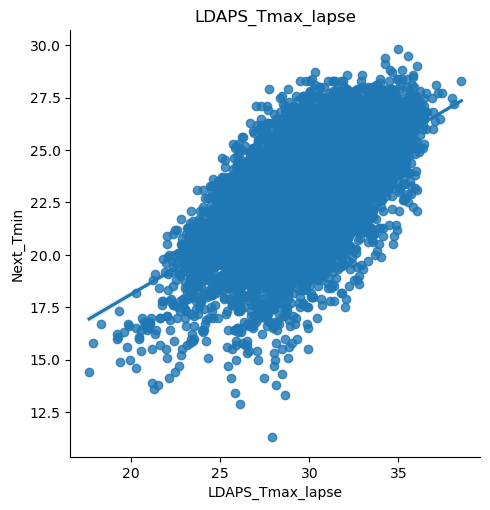

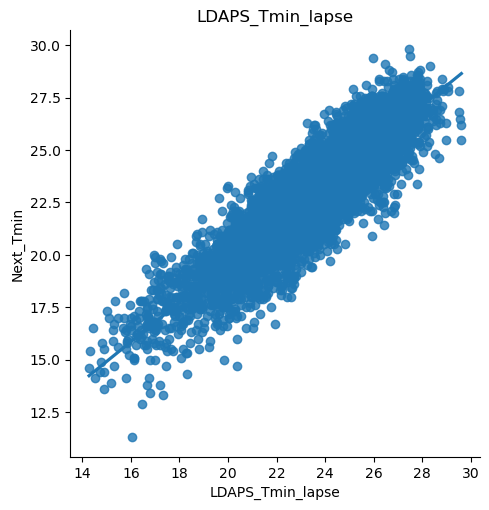

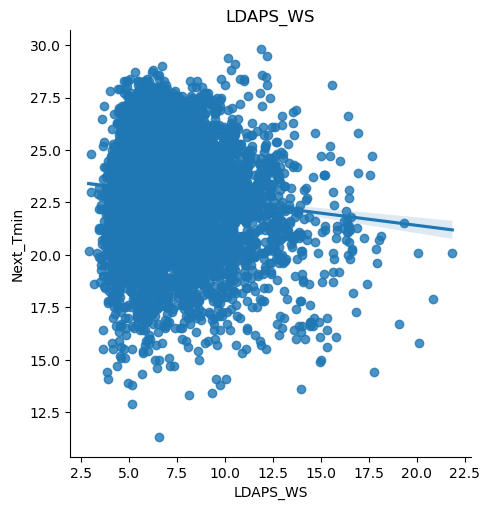

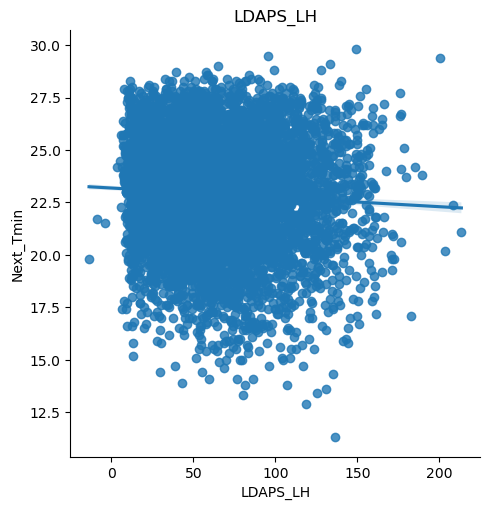

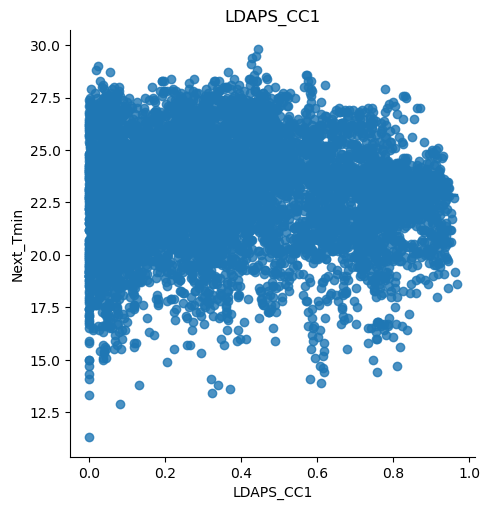

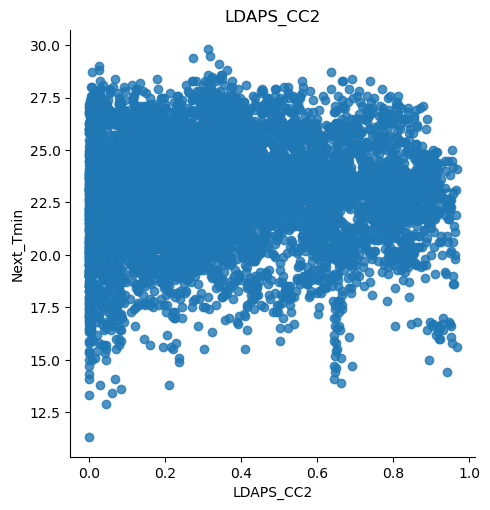

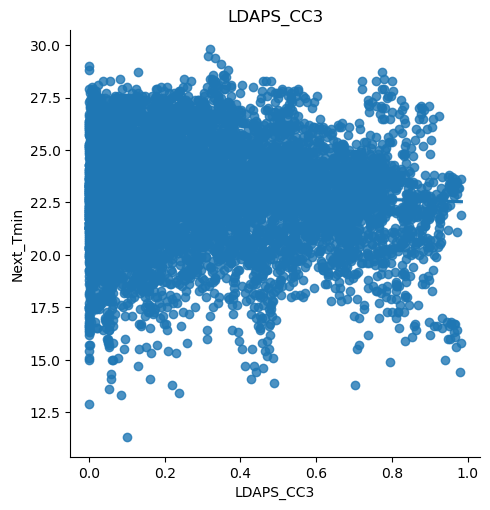

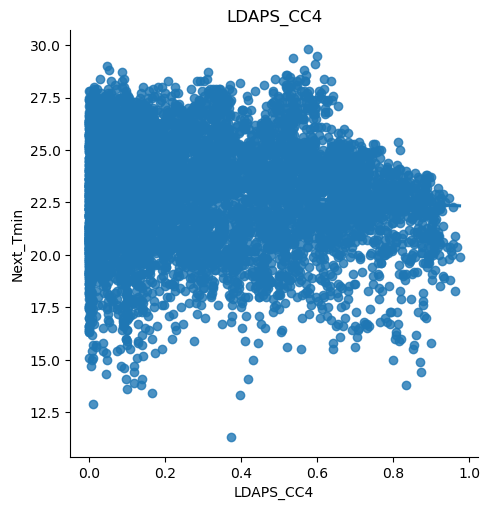

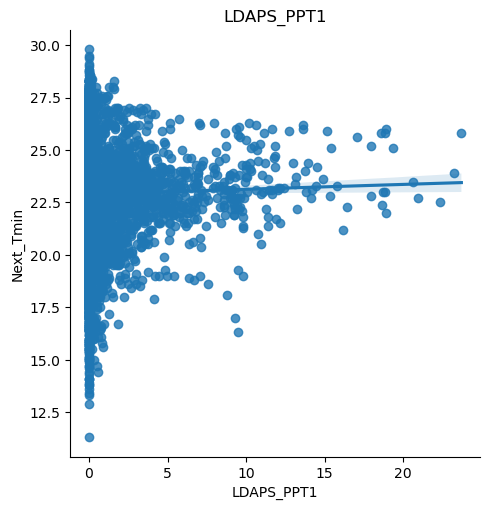

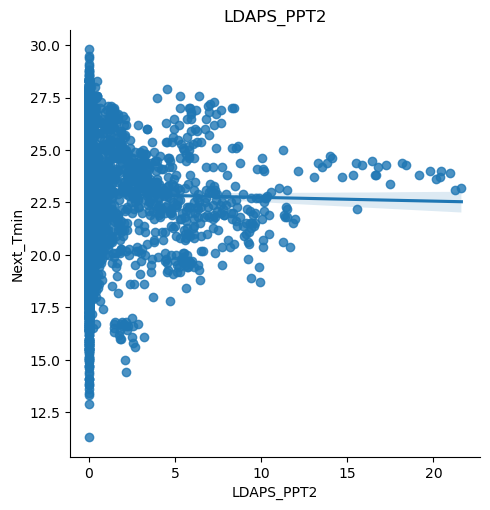

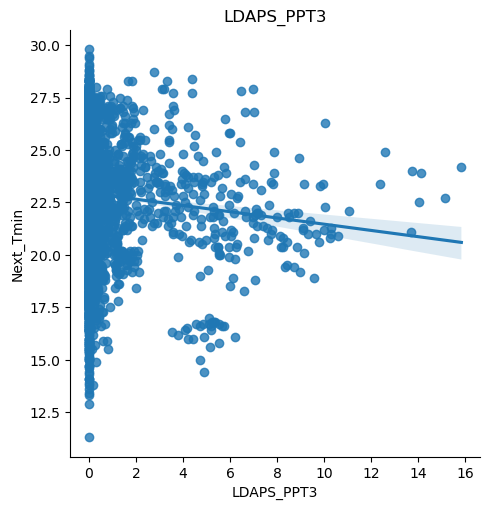

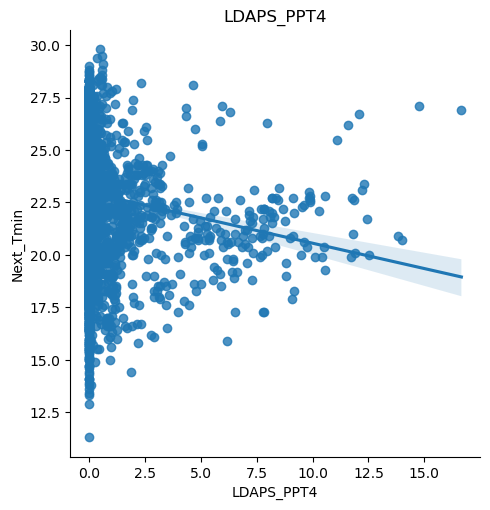

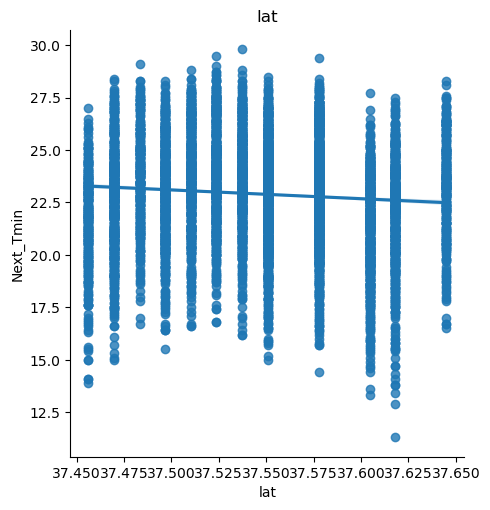

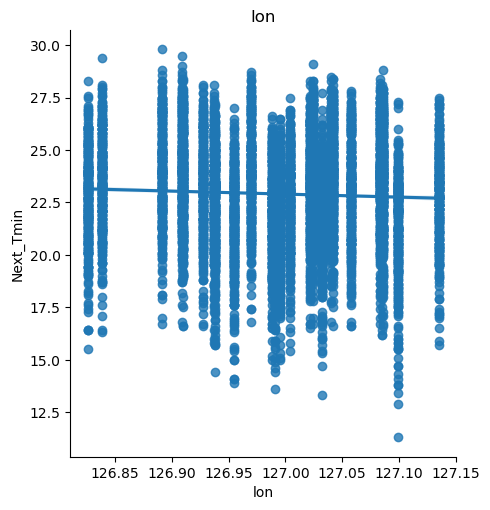

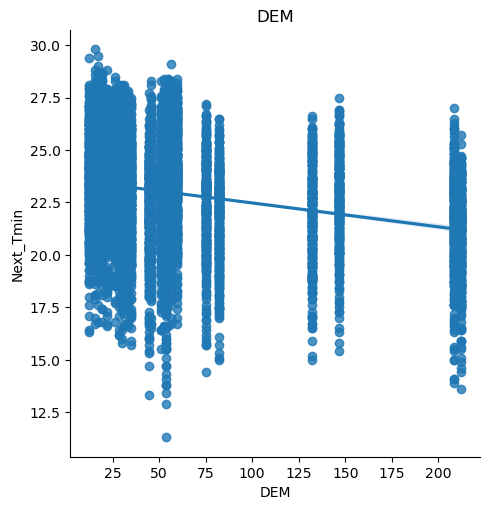

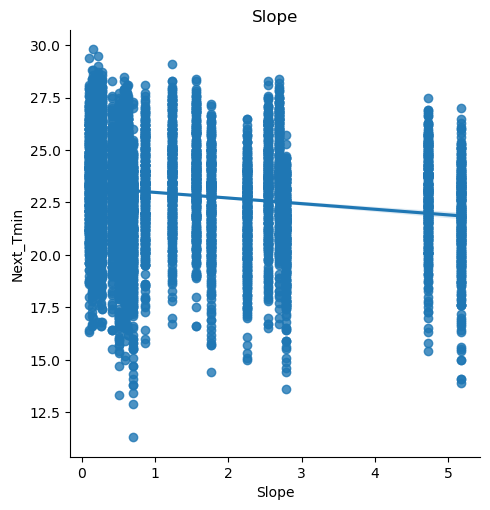

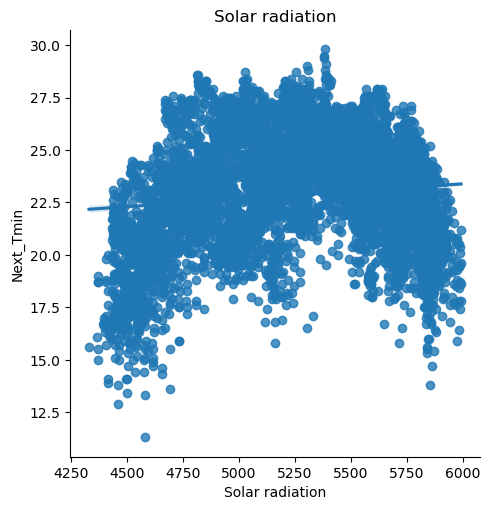

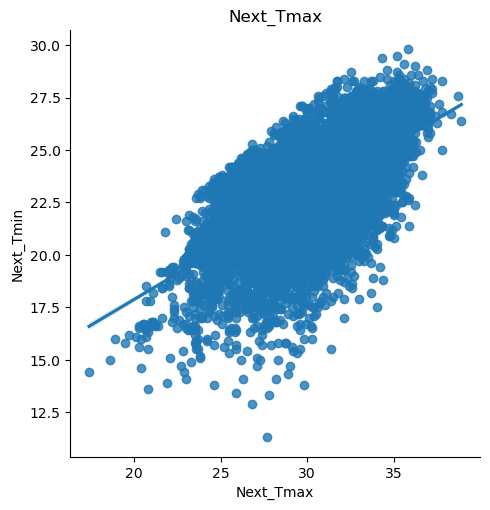

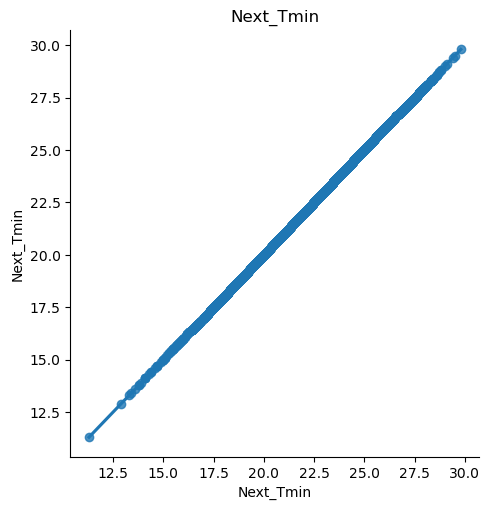

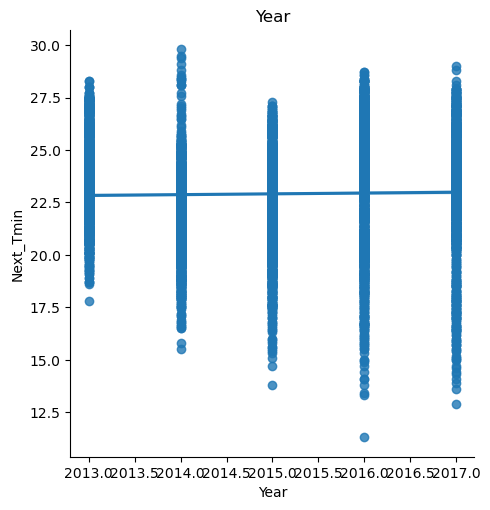

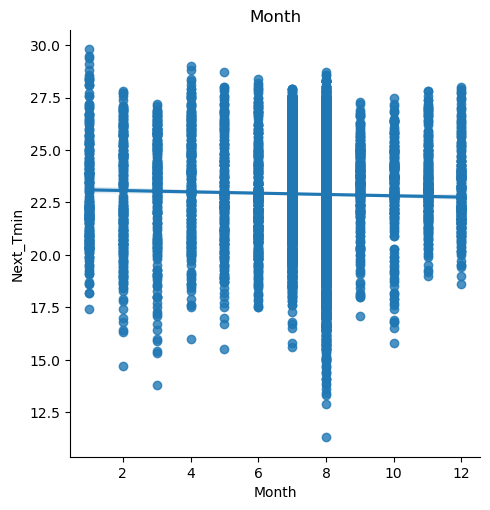

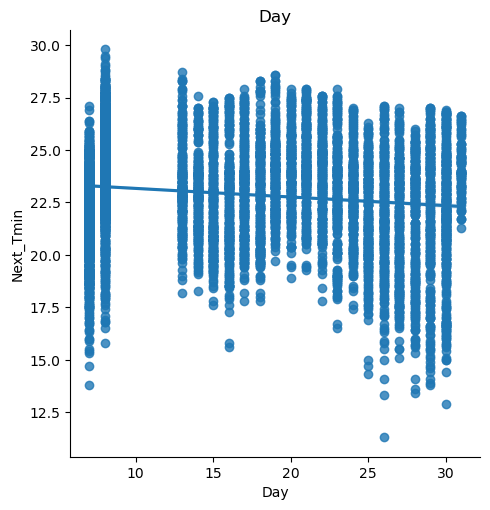

In [37]:
for i in df.columns :
    sns.lmplot(x=i, y='Next_Tmin', data =df)
    plt.xlabel(i)
    plt.ylabel("Next_Tmin")
    plt.title(i)
    plt.show()

From the above graphs, we can see that

    1)The next-day minimum air temperature "Next_Tmin" is directly propotional to "Present_Tmax", "Present_Tmin","LDAPS_Tmax_lapse" and "LDAPS_Tmin_lapse".
    2)The next-day minimum air temperature "Next_Tmin" is inversely propotional to "LDAPS_RHmin", "LDAPS_RHmax", "LDAPS_WS", 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3' and 'LDAPS_PPT4'

# Checking Correlation

In [38]:
df.corr()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Present_Tmax          1.000000      0.615208    -0.209059    -0.306943   
Present_Tmin          0.615208      1.000000     0.122200    -0.018576   
LDAPS_RHmin          -0.209059      0.122200     1.000000     0.578358   
LDAPS_RHmax          -0.306943     -0.018576     0.578358     1.000000   
LDAPS_Tmax_lapse      0.573777      0.467904    -0.569580    -0.377293   
LDAPS_Tmin_lapse      0.628705      0.772061     0.085237    -0.118965   
LDAPS_WS             -0.125952     -0.038779     0.289422     0.131269   
LDAPS_LH              0.134246     -0.012817    -0.072195     0.238986   
LDAPS_CC1            -0.316333      0.084348     0.612831     0.435937   
LDAPS_CC2            -0.216976      0.090038     0.744774     0.390620   
LDAPS_CC3            -0.146391     -0.004719     0.688069     0.224734   
LDAPS_CC4            -0.143069     -0.046694     0.513937     0.127242   
LDAPS_PPT1           -0.114917      0.111577     0.259039     0.268019   
LDAPS_PPT2           -0.104779      0.066207     0.389572     0.227581   
LDAPS_PPT3           -0.127248     -0.052428     0.237512     0.132436   
LDAPS_PPT4           -0.107295     -0.070391     0.167311     0.118101   
lat                  -0.054134     -0.081417     0.085027     0.194820   
lon                   0.007695     -0.045174    -0.077590     0.025563   
DEM                  -0.189439     -0.254084     0.100684     0.176557   
Slope                -0.107079     -0.148423     0.122454     0.219436   
Solar radiation      -0.022114      0.059765     0.242168     0.146622   
Next_Tmax             0.610357      0.463523    -0.446824    -0.289788   
Next_Tmin             0.621048      0.796975     0.093249    -0.076415   
Year                  0.056002      0.037457    -0.002147    -0.144286   
Month                -0.003266     -0.010210    -0.053499    -0.039424   
Day                  -0.154366     -0.115693    -0.063464    -0.012226   

                  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
Present_Tmax              0.573777          0.628705 -0.125952  0.134246   
Present_Tmin              0.467904          0.772061 -0.038779 -0.012817   
LDAPS_RHmin              -0.569580          0.085237  0.289422 -0.072195   
LDAPS_RHmax              -0.377293         -0.118965  0.131269  0.238986   
LDAPS_Tmax_lapse          1.000000          0.653425 -0.316011  0.043663   
LDAPS_Tmin_lapse          0.653425          1.000000 -0.134652 -0.139675   
LDAPS_WS                 -0.316011         -0.134652  1.000000  0.004427   
LDAPS_LH                  0.043663         -0.139675  0.004427  1.000000   
LDAPS_CC1                -0.440878          0.008714  0.285349 -0.148314   
LDAPS_CC2                -0.525380          0.046537  0.257226 -0.265382   
LDAPS_CC3                -0.542728         -0.044998  0.238155 -0.246709   
LDAPS_CC4                -0.429739         -0.079536  0.218870 -0.173156   
LDAPS_PPT1               -0.115659          0.034956  0.141503 -0.018708   
LDAPS_PPT2               -0.248369         -0.002743  0.181634 -0.084375   
LDAPS_PPT3               -0.193749         -0.093116  0.147199  0.009495   
LDAPS_PPT4               -0.170415         -0.103541  0.134428  0.012372   
lat                      -0.044052         -0.099452  0.033025  0.133309   
lon                       0.091568         -0.024703 -0.063009  0.024476   
DEM                      -0.181433         -0.198396  0.188540  0.056362   
Slope                    -0.163891         -0.187864  0.169223  0.087517   
Solar radiation           0.047414          0.157763  0.120630 -0.044956   
Next_Tmax                 0.835729          0.592119 -0.351107  0.156779   
Next_Tmin                 0.589963          0.886513 -0.102021 -0.060392   
Year                      0.020308         -0.000564 -0.114114  0.055898   
Month                    -0.022279         -0.027050 -0.082267 -0.024944   
Day                      -0.161320         

<Axes: >

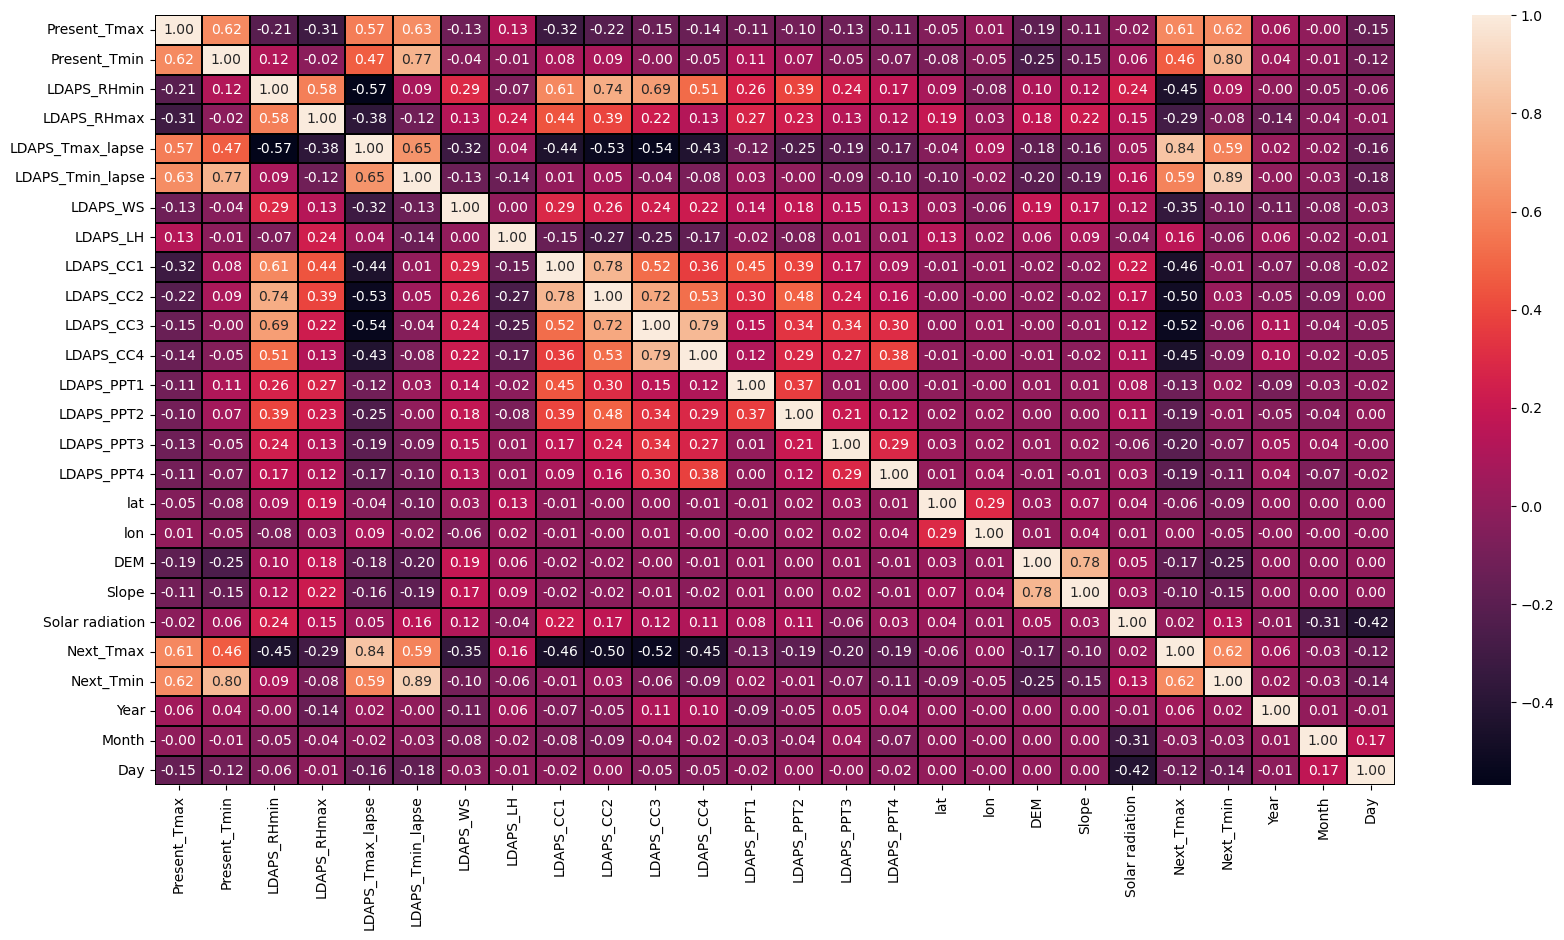

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')

From the above, we can see that

    1) The target variable 'Next_Tmax' has positive correlation with features 'Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse' and 'LDAPS_Tmin_lapse'.
    2) The target variable 'Next_Tmin' has positive correlation with features 'Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse' and 'LDAPS_Tmin_lapse'.
    3) The features 'DEM' and  'Slope' has high correlation with each other.

# Checking for Outliers

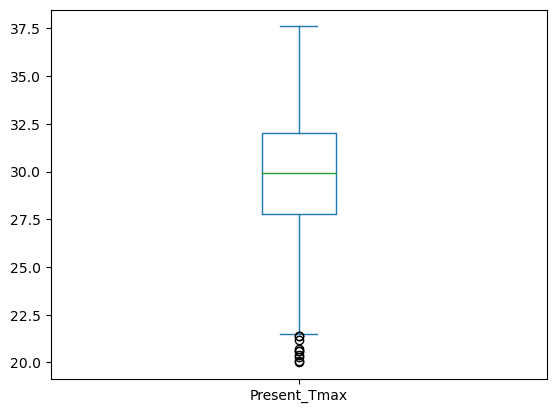

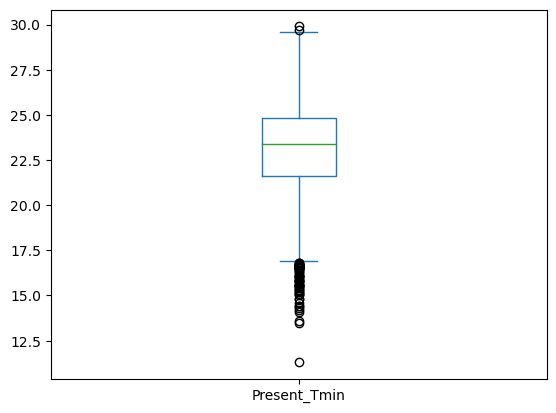

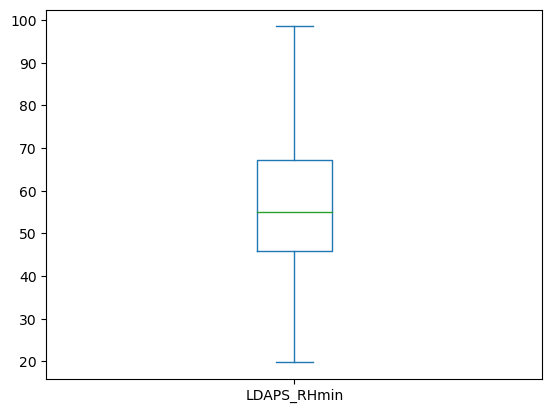

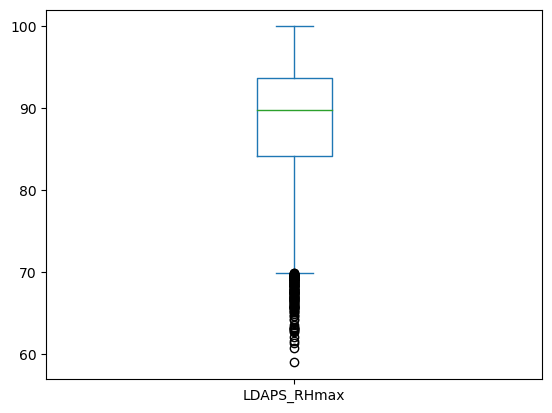

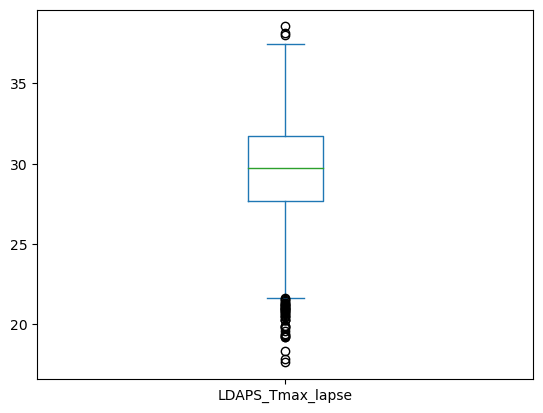

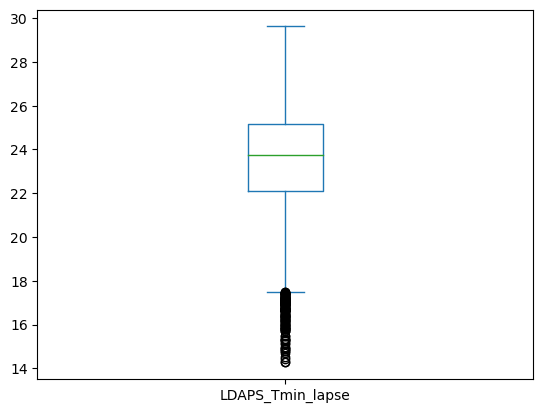

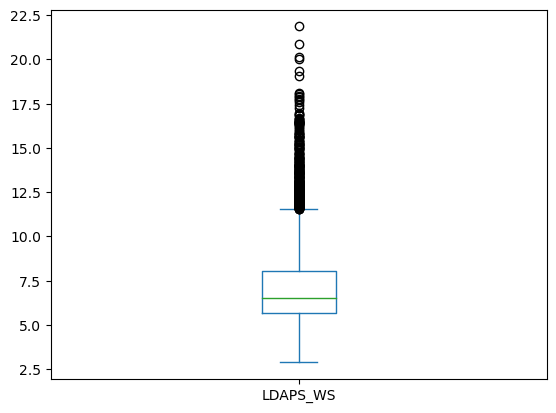

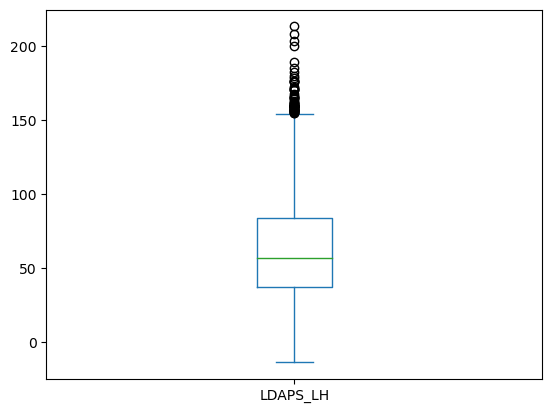

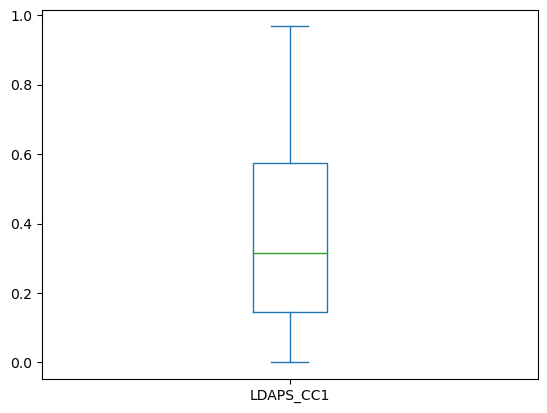

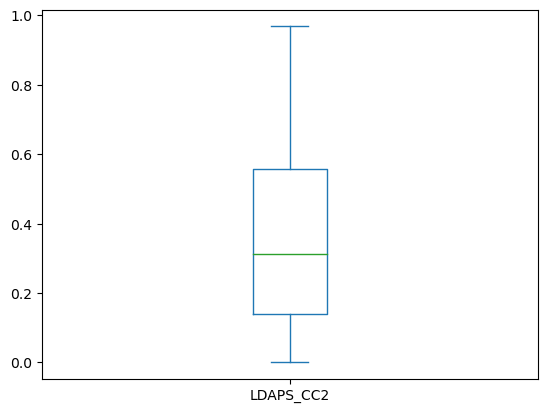

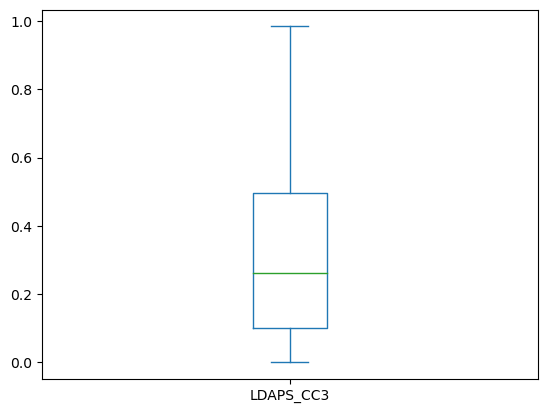

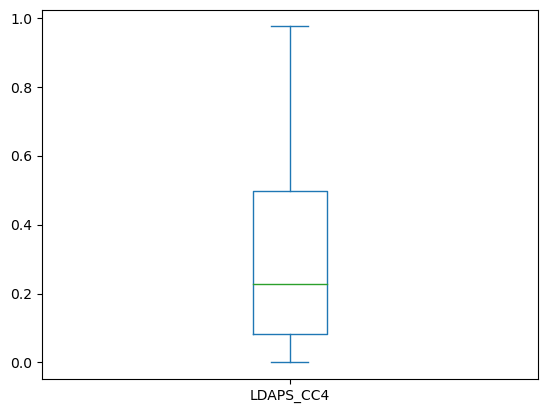

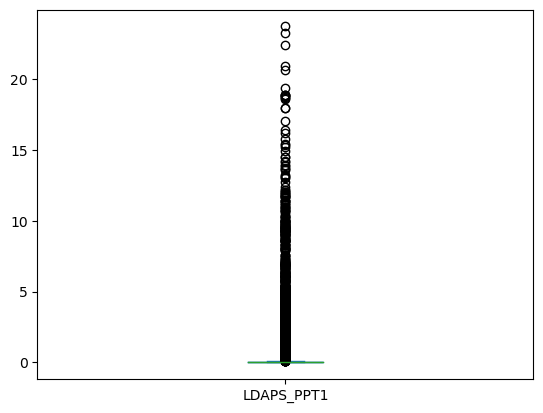

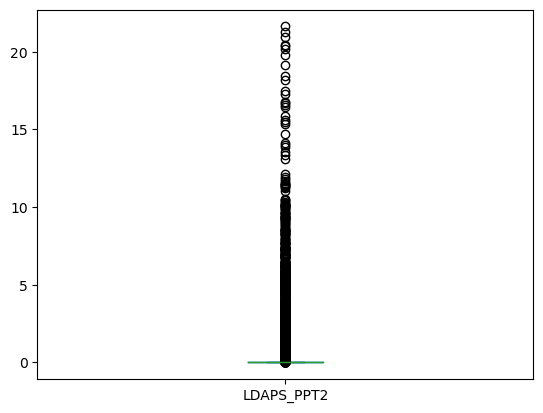

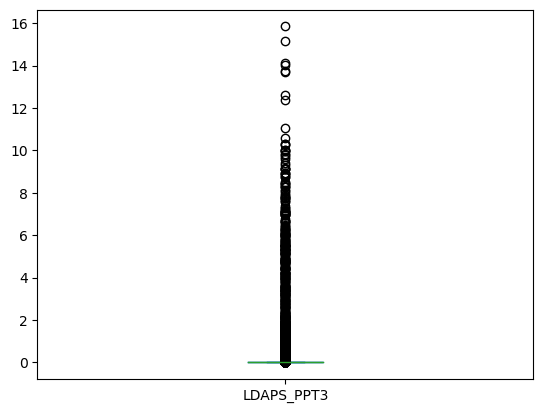

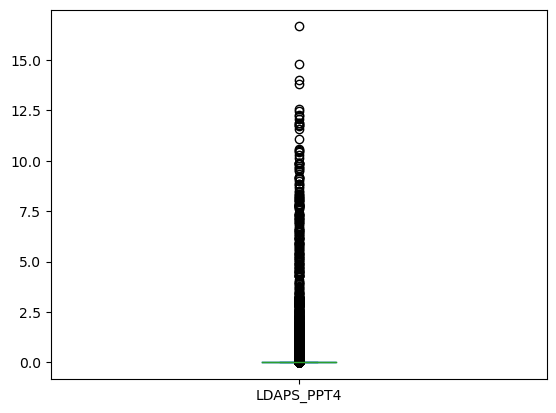

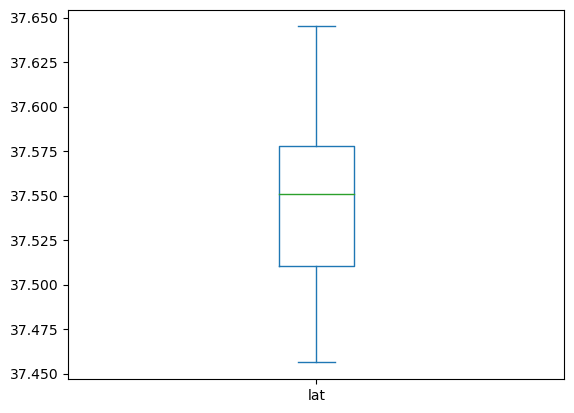

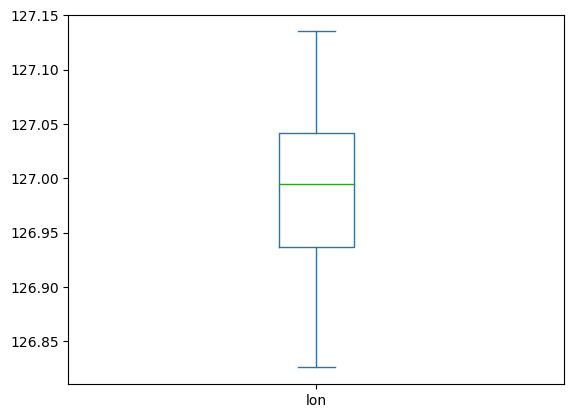

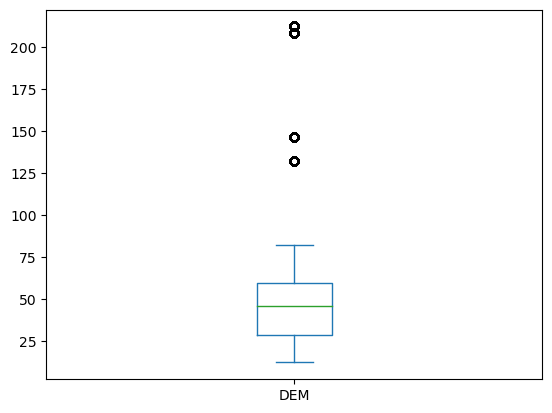

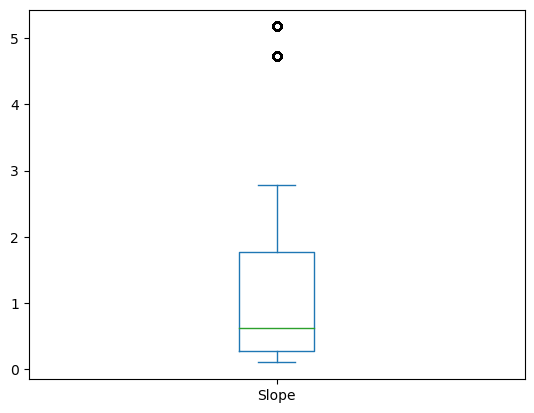

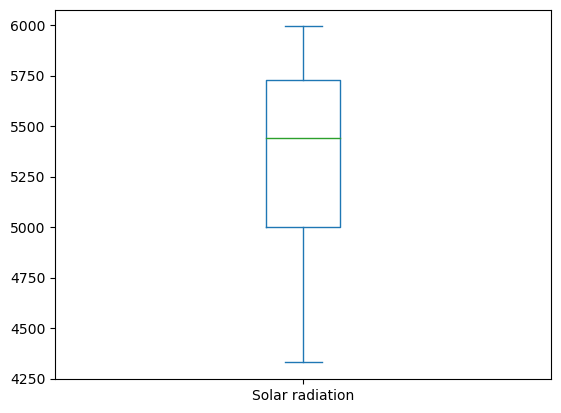

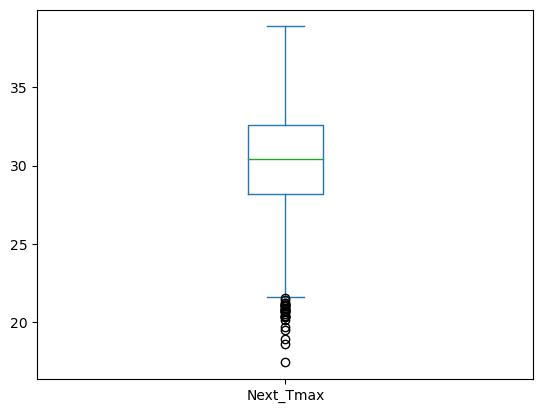

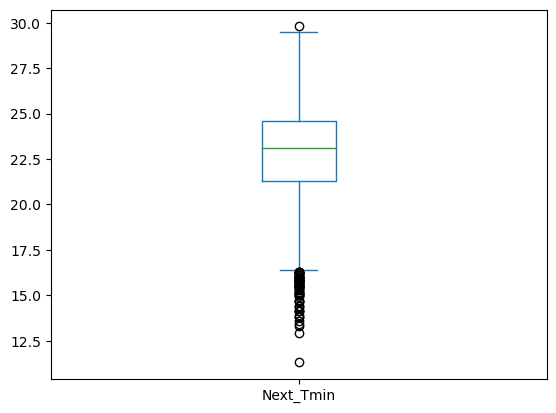

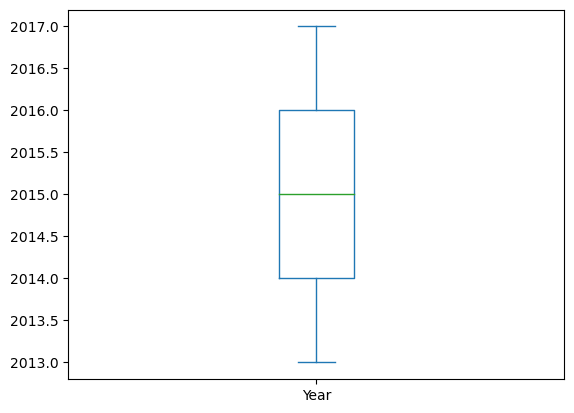

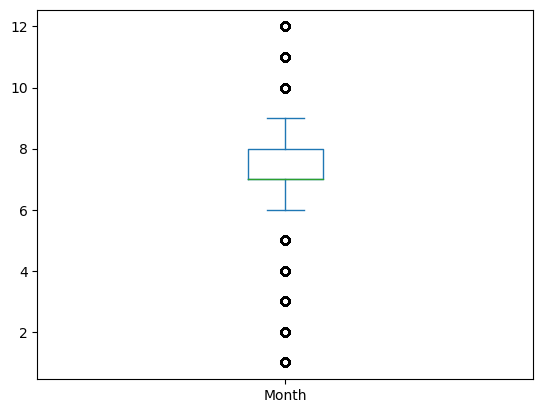

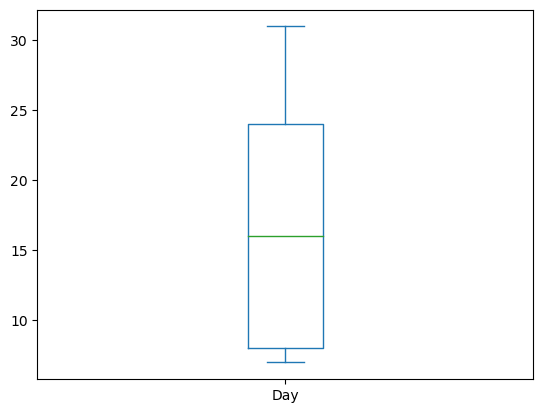

In [41]:
for i in df.columns:
    df[i].plot.box()
    plt.show()

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0         0.353318      0.748029     0.104660     0.382768          0.525269   
1         0.725138      0.664721     0.305052     0.311697          0.078334   
2         0.624033      0.043400     0.549344     0.609425          0.160080   
3         0.758840      0.085054     0.103573     1.128335          0.028710   
4         0.556630      0.539758     0.037665     0.249244          0.171981   
...            ...           ...          ...          ...               ...   
7745      2.240616      2.247578     2.190405     1.402898          0.614083   
7746      2.442826      2.414195     1.820788     0.648815          0.990460   
7747      2.173212      2.539157     2.050081     1.318376          1.110333   
7748      2.173212      2.289232     2.234735     1.537141          0.886737   
7749      2.206914      2.414195     2.310467     1.544257          0.570995   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0             0.215525  0.126423  0.206603   0.513123   0.587938  ...   
1             0.223368  0.644133  0.313359   0.545304   0.402304  ...   
2             0.449896  0.439100  1.244497   0.606944   0.380211  ...   
3             0.079238  0.663353  0.096026   0.580143   0.502221  ...   
4             0.010803  0.624327  1.349989   0.827872   0.409191  ...   
...                ...       ...       ...        ...        ...  ...   
7745          2.223667  0.225479  1.569844   1.203497   1.261546  ...   
7746          2.432415  0.609132  0.583486   1.151793   1.283455  ...   
7747          2.021883  0.434188  0.283984   1.290699   1.064318  ...   
7748          2.039881  0.253241  0.452772   1.268430   1.087864  ...   
7749          2.129768  0.089654  1.585402   1.218554   1.146389  ...   

           lat       lon       DEM     Slope  Solar radiation  Next_Tmax  \
0     1.186076  0.005302  2.769091  1.111162         1.510565   0.366861   
1     1.186076  0.512280  0.315828  0.543220         1.222997   0.083068   
2     0.650626  0.840503  0.526719  0.723891         1.209602   0.275895   
3     1.987268  0.386040  0.298272  0.928888         1.194265   0.468721   
4     0.117159  1.812547  0.494848  0.549485         1.200286   0.308032   
...        ...       ...       ...       ...              ...        ...   
7745  0.117159  0.613271  0.655747  0.500966         2.065599   0.848928   
7746  0.686016  1.193973  0.735482  0.820711         2.098689   0.720377   
7747  0.150566  1.267697  0.852919  0.804538         2.095175   0.623964   
7748  0.418291  1.040466  0.821476  0.755800         2.106671   0.527550   
7749  0.418291  0.270405  0.779341  0.720103         2.076487   0.784652   

      Next_Tmin      Year     Month       Day  
0      0.689265  1.411767  0.476369  1.662861  
1      0.165513  1.411767  0.476369  1.662861  
2      0.398527  1.411767  0.476369  1.662861  
3      0.559681  1.411767  0.476369  1.662861  
4      0.165513  1.411767  0.476369  1.662861  
...         ...       ...       ...       ...  
7745   2.099366  1.423537  0.415596  1.662861  
7746   2.341098  1.423537  0.415596  1.662861  
7747   1.938212  1.423537  0.415596  1.662861  
7748   1.656192  1.423537  0.415596  1.662861  
7749   2.220232  1.423537  0.415596  1.662861  

[7588 rows x 26 columns]

In [43]:
# threshold =3
np.where(z>3)

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64),
 array([ 6, 13, 13, ...,  1,  1,  5], dtype=int64))

In [44]:
z.iloc[25,6]

3.911059950709196

In [45]:
df_new=df[(z<3).all(axis=1)]
df_new

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0             28.7          21.4    58.255688    91.116364         28.074101   
1             31.9          21.6    52.263397    90.604721         29.850689   
2             31.6          23.3    48.690479    83.973587         30.091292   
3             32.0          23.4    58.239788    96.483688         29.704629   
4             31.4          21.9    56.174095    90.155128         29.113934   
...            ...           ...          ...          ...               ...   
7745          23.1          17.8    24.688997    78.261383         27.812697   
7746          22.5          17.4    30.094858    83.690018         26.704905   
7747          23.3          17.1    26.741310    78.869858         26.352081   
7748          23.3          17.7    24.040634    77.294975         27.010193   
7749          23.2          17.4    22.933014    77.243744         27.939516   

      LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0            23.006936  6.818887   69.451805   0.233947   0.203896  ...   
1            24.035009  5.691890   51.937448   0.225508   0.251771  ...   
2            24.565633  6.138224   20.573050   0.209344   0.257469  ...   
3            23.326177  5.650050   65.727144   0.216372   0.226002  ...   
4            23.486480  5.735004  107.965535   0.151407   0.249995  ...   
...                ...       ...         ...        ...        ...  ...   
7745         18.303014  6.603253    9.614074   0.052902   0.030169  ...   
7746         17.814038  5.768083   82.146707   0.066461   0.024518  ...   
7747         18.775678  6.148918   72.058294   0.030034   0.081035  ...   
7748         18.733519  6.542819   47.241457   0.035874   0.074962  ...   
7749         18.522965  7.289264    9.090034   0.048954   0.059869  ...   

          lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0     37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1     37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2     37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3     37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4     37.5507  127.135   35.0380  0.5055      5859.552246       31.2   
...       ...      ...       ...     ...              ...        ...   
7745  37.5507  127.040   26.2980  0.5721      4456.024414       27.6   
7746  37.5102  127.086   21.9668  0.1332      4441.803711       28.0   
7747  37.5372  126.891   15.5876  0.1554      4443.313965       28.3   
7748  37.5237  126.909   17.2956  0.2223      4438.373535       28.6   
7749  37.5237  126.970   19.5844  0.2713      4451.345215       27.8   

      Next_Tmin  Year  Month  Day  
0          21.2  2013      6   30  
1          22.5  2013      6   30  
2          23.9  2013      6   30  
3          24.3  2013      6   30  
4          22.5  2013      6   30  
...         ...   ...    ...  ...  
7745       17.7  2017      8   30  
7746       17.1  2017      8   30  
7747       18.1  2017      8   30  
7748       18.8  2017      8   30  
7749       17.4  2017      8   30  

[6739 rows x 26 columns]

In [46]:
df_new.shape

(6739, 26)

In [47]:
df.shape

(7588, 26)

In [48]:
print("Data loss percentage = ",((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Data loss percentage =  11.188719030047443


Here, we can see that more than 10% datas are having outliers. so we will keep the outliers beacuse we cant afford to lose 11% of datas.

# Checking Skewness

In [49]:
df.skew()

Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Year                0.013575
Month              -0.703092
Day                 0.245563
dtype: float64

In [50]:
df['LDAPS_RHmax'] = np.cbrt(df['LDAPS_RHmax'])
df['LDAPS_WS'] = np.cbrt(df['LDAPS_WS'])
df['LDAPS_PPT1'] = np.cbrt(df['LDAPS_PPT1'])
df['LDAPS_PPT2'] = np.cbrt(df['LDAPS_PPT2'])
df['LDAPS_PPT3'] = np.cbrt(df['LDAPS_PPT3'])
df['LDAPS_PPT4'] = np.cbrt(df['LDAPS_PPT4'])
df['DEM'] = np.cbrt(df['DEM'])
df['Slope'] = np.cbrt(df['Slope'])

In [51]:
df.skew()

Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.989682
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            0.877761
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          1.955868
LDAPS_PPT2          2.267487
LDAPS_PPT3          2.575795
LDAPS_PPT4          2.837790
lat                 0.085377
lon                -0.289048
DEM                 0.919265
Slope               0.612855
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Year                0.013575
Month              -0.703092
Day                 0.245563
dtype: float64

# Splitting TWO target variables

In [52]:
x = df.drop( ["Next_Tmax","Next_Tmin"], axis = 1)
y1= df['Next_Tmax']
y2= df['Next_Tmin']

In [53]:
x

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0             28.7          21.4    58.255688     4.499858         28.074101   
1             31.9          21.6    52.263397     4.491419         29.850689   
2             31.6          23.3    48.690479     4.379060         30.091292   
3             32.0          23.4    58.239788     4.586534         29.704629   
4             31.4          21.9    56.174095     4.483978         29.113934   
...            ...           ...          ...          ...               ...   
7745          23.1          17.8    24.688997     4.277426         27.812697   
7746          22.5          17.4    30.094858     4.374125         26.704905   
7747          23.3          17.1    26.741310     4.288483         26.352081   
7748          23.3          17.7    24.040634     4.259746         27.010193   
7749          23.2          17.4    22.933014     4.258805         27.939516   

      LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0            23.006936  1.896289   69.451805   0.233947   0.203896  ...   
1            24.035009  1.785468   51.937448   0.225508   0.251771  ...   
2            24.565633  1.830969   20.573050   0.209344   0.257469  ...   
3            23.326177  1.781083   65.727144   0.216372   0.226002  ...   
4            23.486480  1.789965  107.965535   0.151407   0.249995  ...   
...                ...       ...         ...        ...        ...  ...   
7745         18.303014  1.876086    9.614074   0.052902   0.030169  ...   
7746         17.814038  1.793400   82.146707   0.066461   0.024518  ...   
7747         18.775678  1.832031   72.058294   0.030034   0.081035  ...   
7748         18.733519  1.870345   47.241457   0.035874   0.074962  ...   
7749         18.522965  1.938926    9.090034   0.048954   0.059869  ...   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0            0.0         0.0  37.6046  126.991  5.965871  1.406938   
1            0.0         0.0  37.6046  127.032  3.550622  0.801092   
2            0.0         0.0  37.5776  127.058  3.217444  0.643203   
3            0.0         0.0  37.6450  127.022  3.575659  1.363477   
4            0.0         0.0  37.5507  127.135  3.272250  0.796600   
...          ...         ...      ...      ...       ...       ...   
7745         0.0         0.0  37.5507  127.040  2.973771  0.830151   
7746         0.0         0.0  37.5102  127.086  2.800629  0.510703   
7747         0.0         0.0  37.5372  126.891  2.498004  0.537630   
7748         0.0         0.0  37.5237  126.909  2.586099  0.605778   
7749         0.0         0.0  37.5237  126.970  2.695484  0.647366   

      Solar radiation  Year  Month  Day  
0         5992.895996  2013      6   30  
1         5869.312500  2013      6   30  
2         5863.555664  2013      6   30  
3         5856.964844  2013      6   30  
4         5859.552246  2013      6   30  
...               ...   ...    ...  ...  
7745      4456.024414  2017      8   30  
7746      4441.803711  2017      8   30  
7747      4443.313965  2017      8   30  
7748      4438.373535  2017      8   30  
7749      4451.345215  2017      8   30  

[7588 rows x 24 columns]

In [54]:
y1

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7588, dtype: float64

In [55]:
y2

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7588, dtype: float64

# To remove biasness, we use Standard scaler method

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.353318     -0.748029     0.104660     0.396101         -0.525269   
1         0.725138     -0.664721    -0.305052     0.328258          0.078334   
2         0.624033      0.043400    -0.549344    -0.575076          0.160080   
3         0.758840      0.085054     0.103573     1.092951          0.028710   
4         0.556630     -0.539758    -0.037665     0.268432         -0.171981   
...            ...           ...          ...          ...               ...   
7583     -2.240616     -2.247578    -2.190405    -1.392182         -0.614083   
7584     -2.442826     -2.414195    -1.820788    -0.614750         -0.990460   
7585     -2.173212     -2.539157    -2.050081    -1.303288         -1.110333   
7586     -2.173212     -2.289232    -2.234735    -1.534320         -0.886737   
7587     -2.206914     -2.414195    -2.310467    -1.541888         -0.570995   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0            -0.215525 -0.042360  0.206603  -0.513123  -0.587938  ...   
1             0.223368 -0.654843 -0.313359  -0.545304  -0.402304  ...   
2             0.449896 -0.403372 -1.244497  -0.606944  -0.380211  ...   
3            -0.079238 -0.679081  0.096026  -0.580143  -0.502221  ...   
4            -0.010803 -0.629990  1.349989  -0.827872  -0.409191  ...   
...                ...       ...       ...        ...        ...  ...   
7583         -2.223667 -0.154019 -1.569844  -1.203497  -1.261546  ...   
7584         -2.432415 -0.611006  0.583486  -1.151793  -1.283455  ...   
7585         -2.021883 -0.397499  0.283984  -1.290699  -1.064318  ...   
7586         -2.039881 -0.185749 -0.452772  -1.268430  -1.087864  ...   
7587         -2.129768  0.193287 -1.585402  -1.218554  -1.146389  ...   

      LDAPS_PPT3  LDAPS_PPT4       lat       lon       DEM     Slope  \
0      -0.483908   -0.430019  1.186076 -0.005302  2.325747  1.268627   
1      -0.483908   -0.430019  1.186076  0.512280 -0.149387 -0.424853   
2      -0.483908   -0.430019  0.650626  0.840503 -0.490827 -0.866189   
3      -0.483908   -0.430019  1.987268  0.386040 -0.123730  1.147143   
4      -0.483908   -0.430019  0.117159  1.812547 -0.434662 -0.437410   
...          ...         ...       ...       ...       ...       ...   
7583   -0.483908   -0.430019  0.117159  0.613271 -0.740541 -0.343626   
7584   -0.483908   -0.430019 -0.686016  1.193973 -0.917976 -1.236560   
7585   -0.483908   -0.430019 -0.150566 -1.267697 -1.228105 -1.161291   
7586   -0.483908   -0.430019 -0.418291 -1.040466 -1.137825 -0.970803   
7587   -0.483908   -0.430019 -0.418291 -0.270405 -1.025728 -0.854554   

      Solar radiation      Year     Month       Day  
0            1.510565 -1.411767 -0.476369  1.662861  
1            1.222997 -1.411767 -0.476369  1.662861  
2            1.209602 -1.411767 -0.476369  1.662861  
3            1.194265 -1.411767 -0.476369  1.662861  
4            1.200286 -1.411767 -0.476369  1.662861  
...               ...       ...       ...       ...  
7583        -2.065599  1.423537  0.415596  1.662861  
7584        -2.098689  1.423537  0.415596  1.662861  
7585        -2.095175  1.423537  0.415596  1.662861  
7586        -2.106671  1.423537  0.415596  1.662861  
7587        -2.076487  1.423537  0.415596  1.662861  

[7588 rows x 24 columns]

# Checking multicollinearity

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["features"] = x.columns

vif

VIF values          features
0     2.853015      Present_Tmax
1     3.189163      Present_Tmin
2     6.491764       LDAPS_RHmin
3     2.277125       LDAPS_RHmax
4     7.847466  LDAPS_Tmax_lapse
5     7.559940  LDAPS_Tmin_lapse
6     1.299961          LDAPS_WS
7     1.560457          LDAPS_LH
8     4.872170         LDAPS_CC1
9     6.074871         LDAPS_CC2
10    5.842280         LDAPS_CC3
11    3.415828         LDAPS_CC4
12    2.535079        LDAPS_PPT1
13    2.410010        LDAPS_PPT2
14    1.869753        LDAPS_PPT3
15    1.965809        LDAPS_PPT4
16    1.196951               lat
17    1.180831               lon
18    2.887940               DEM
19    2.806694             Slope
20    1.556061   Solar radiation
21    1.123835              Year
22    1.141481             Month
23    1.298094               Day

Here we can see that no multicollinearity present between features.

# MODEL BUILDING For Next day Maximum Temperature "Next_Tmax".

Finding best random state

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [91]:
maxAcc = 0
maxRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print("The best r2_score is ", maxAcc, "at random state ", maxRS)

The best r2_score is  0.7976104333288918 at random state  43


Train Test split

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.30,random_state=maxRS)

# Regression Algorithms

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [61]:
#Creating a list for models
LR = LinearRegression()
KNN = KNeighborsRegressor()
DTC = DecisionTreeRegressor()
RFR = RandomForestRegressor()
ETC = ExtraTreesRegressor()
GBR = GradientBoostingRegressor()
ABR = AdaBoostRegressor()
BR = BaggingRegressor()
LS = Lasso()
RD = Ridge()

models = [LR, KNN, DTC, RFR, ETC, GBR, ABR, BR, LS, RD]

# R2 SCORE AND CROSS VALIDATION FOR ALL MODELS.

In [106]:
for i in models:
    print(i)
    print("------------------------")
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    pred_train = i.predict(x_train)
    print('R2_score : ', r2_score(y_test,pred)*100)
    print('R2_score on training data : ', r2_score(y_train,pred_train)*100)
    print('Mean Absolute Error : ', mean_absolute_error(y_test,pred))
    print('Mean Squared Error : ', mean_squared_error(y_test,pred))
    print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,pred)))
    print("Cross Validation:")
    print("-----------------")
    score = cross_val_score(i,x,y1)
    print("CV Scores are : ", score)
    print("CV Score mean : ", score.mean())
    print("Difference between R2_score score and CV score is ", (r2_score(y_test,pred) - score.mean())*100)
    print('\n\n')

LinearRegression()
------------------------
R2_score :  79.76104333288919
R2_score on training data :  76.73306118071446
Mean Absolute Error :  1.0817207167967748
Mean Squared Error :  2.035633960924984
Root Mean Squared Error :  1.4267564476549541
Cross Validation:
-----------------
CV Scores are :  [0.6942606  0.64784792 0.69376921 0.8084811  0.61187672]
CV Score mean :  0.6912471097814393
Difference between R2_score score and CV score is  10.636332354745248



KNeighborsRegressor()
------------------------
R2_score :  90.8303193687139
R2_score on training data :  93.31209741365306
Mean Absolute Error :  0.7085726833552921
Mean Squared Error :  0.9222863416776461
Root Mean Squared Error :  0.9603574030941012
Cross Validation:
-----------------
CV Scores are :  [0.46264014 0.36182703 0.4441384  0.65151142 0.59021047]
CV Score mean :  0.5020654913799587
Difference between R2_score score and CV score is  40.62377023071802



DecisionTreeRegressor()
------------------------
R2_score :  7

As we can see that GradientBoostingRegressor has the highest R2_score and cross_val_score and the diff bet r2 score and cv also less

# GradientBoostingRegressor is our best model

Hyper Parameter Tuning

In [107]:
#Using Grid Search CV on Gradient Boosting Regressor

from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['friedman_mse', 'squared_error'],
              'n_estimators' : [50, 100, 200],
              'max_depth' : [1, 3, 5]}

In [108]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv = 5 )

In [109]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [50, 100, 200]})

In [110]:
Best_Parameters = GCV.best_params_
print(Best_Parameters)

{'criterion': 'friedman_mse', 'max_depth': 5, 'n_estimators': 200}


Finding best random state for our best model.

In [111]:
maxAcc = 0
maxiRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.30,random_state=i)
    GBR = GradientBoostingRegressor()
    GBR.fit(x_train,y_train)
    pred = GBR.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxiRS = i
        
print("The best r2_score is ", maxAcc, "at random state ", maxiRS)

The best r2_score is  0.8771130845315157 at random state  30


# Building Final model using best parameters

In [112]:
Final_model= GradientBoostingRegressor(criterion = 'friedman_mse', max_depth = 5, n_estimators = 200)
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.30,random_state=30)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('R2_score : ', r2_score(y_test,pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred))
print('Mean Squared Error : ', mean_squared_error(y_test,pred))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,pred)))

R2_score :  0.9350634870470245
Mean Absolute Error :  0.6251899999351118
Mean Squared Error :  0.6475320581845081
Root Mean Squared Error :  0.8046937667116032


# The R2_score for our best model is 93%

# Saving the Best model

In [113]:
import joblib
joblib.dump(Final_model, "Temperature_Forecast_Project_Max_Temp.pkl")

['Temperature_Forecast_Project_Max_Temp.pkl']

# Loading and Prediction

In [114]:
load_model= joblib.load("Temperature_Forecast_Project_Max_Temp.pkl")

In [115]:
prediction=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [116]:
prediction

0          1          2          3          4         5     \
Predicted  32.111669  30.056108  34.332702  36.240608  34.745549  26.41288   
Original   36.100000  30.500000  35.100000  37.000000  33.900000  27.10000   

                6         7          8          9     ...       2267  \
Predicted  29.317322  31.21113  27.017121  28.408356  ...  28.294517   
Original   29.000000  30.20000  27.500000  25.500000  ...  27.100000   

                2268       2269       2270      2271       2272       2273  \
Predicted  28.612636  25.083932  32.926413  32.07593  32.670541  33.174965   
Original   28.400000  25.500000  32.700000  31.70000  32.700000  34.400000   

                2274       2275       2276  
Predicted  29.494776  29.714566  31.759163  
Original   31.200000  30.800000  32.400000  

[2 rows x 2277 columns]

Text(0, 0.5, 'Predicted Maximum Temperature')

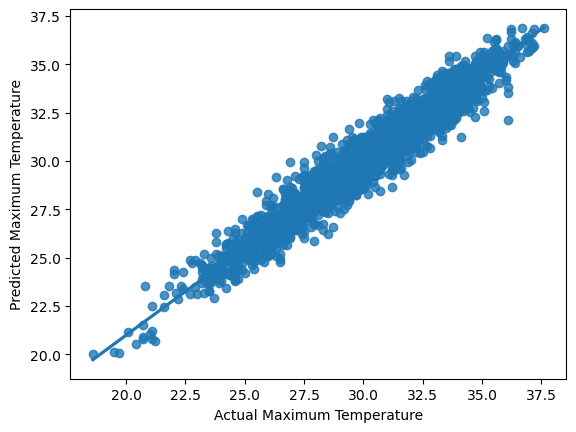

In [117]:
sns.regplot(x=y_test[:],y=load_model.predict(x_test)[:])
plt.xlabel('Actual Maximum Temperature')
plt.ylabel('Predicted Maximum Temperature')

# MODEL BUILDING For Next day Minimum Temperature "Next_Tmin".

Finding best random state

In [118]:
maxAcc = 0
maxiRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y2,test_size=0.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxiRS = i
        
print("The best r2_score is ", maxAcc, "at random state ", maxiRS)

The best r2_score is  0.8545835945842084 at random state  103


# Train Test split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y2,test_size=0.30,random_state=maxiRS)

# R2 SCORE AND CROSS VALIDATION FOR ALL MODELS.

In [122]:
for i in models:
    print(i)
    print("------------------------")
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    pred_train = i.predict(x_train)
    print('R2_score : ', r2_score(y_test,pred)*100)
    print('R2_score on training data : ', r2_score(y_train,pred_train)*100)
    print('Mean Absolute Error : ', mean_absolute_error(y_test,pred))
    print('Mean Squared Error : ', mean_squared_error(y_test,pred))
    print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,pred)))
    print("Cross Validation:")
    print("-----------------")
    score = cross_val_score(i,x,y1)
    print("CV Scores are : ", score)
    print("CV Score mean : ", score.mean())
    print("Difference between R2_score score and CV score is ", (r2_score(y_test,pred) - score.mean())*100)
    print('\n\n')

LinearRegression()
------------------------
R2_score :  85.45835945842084
R2_score on training data :  82.8877695883708
Mean Absolute Error :  0.7515713320672494
Mean Squared Error :  0.9300327701749523
Root Mean Squared Error :  0.9643820664938519
Cross Validation:
-----------------
CV Scores are :  [0.6942606  0.64784792 0.69376921 0.8084811  0.61187672]
CV Score mean :  0.6912471097814393
Difference between R2_score score and CV score is  16.333648480276906



KNeighborsRegressor()
------------------------
R2_score :  89.69833503958196
R2_score on training data :  92.78894773278637
Mean Absolute Error :  0.6120772946859905
Mean Squared Error :  0.6588586736934564
Root Mean Squared Error :  0.8117010987386036
Cross Validation:
-----------------
CV Scores are :  [0.46264014 0.36182703 0.4441384  0.65151142 0.59021047]
CV Score mean :  0.5020654913799587
Difference between R2_score score and CV score is  39.491785901586084



DecisionTreeRegressor()
------------------------
R2_score : 

As we can see that GradientBoostingRegressor has the highest R2_score and cross_val_score and the diff bet r2 score and cv also less

# GradientBoostingRegressor is our best model

Hyper Parameter Tuning

In [65]:
#Using Grid Search CV on Gradient Boosting Regressor

from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['friedman_mse', 'squared_error'],
              'n_estimators' : [50, 100, 200],
              'max_depth' : [1, 3, 5]}


In [68]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv = 5 )

In [69]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [50, 100, 200]})

In [70]:
Best_Parameters = GCV.best_params_
print(Best_Parameters)

{'criterion': 'friedman_mse', 'max_depth': 5, 'n_estimators': 200}


Finding best random state for our best model.

In [71]:
maxAcc = 0
maxiRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y2,test_size=0.30,random_state=i)
    GBR = GradientBoostingRegressor()
    GBR.fit(x_train,y_train)
    pred = GBR.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxiRS = i
        
print("The best r2_score is ", maxAcc, "at random state ", maxiRS)

The best r2_score is  0.901501572658861 at random state  103


# Building Final model using best parameters

In [72]:
Final_model= GradientBoostingRegressor(criterion = 'friedman_mse', max_depth = 5, n_estimators = 200)
x_train,x_test,y_train,y_test=train_test_split(x,y2,test_size=0.30,random_state=103)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('R2_score : ', r2_score(y_test,pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred))
print('Mean Squared Error : ', mean_squared_error(y_test,pred))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,pred)))

R2_score :  0.9456551503142527
Mean Absolute Error :  0.4559436135736997
Mean Squared Error :  0.34757076379009555
Root Mean Squared Error :  0.5895513241356477


# The R2_score for our best model is 94%

# Saving the Best model

In [73]:
import joblib
joblib.dump(Final_model, "Temperature_Forecast_Project_Min_Temp.pkl")

['Temperature_Forecast_Project_Min_Temp.pkl']

# Loading and Prediction

In [74]:
load_model= joblib.load("Temperature_Forecast_Project_Min_Temp.pkl")

In [75]:
prediction=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [76]:
prediction

0          1          2          3          4          5     \
Predicted  21.488212  25.576178  18.644693  25.168948  21.897142  22.067649   
Original   21.700000  25.000000  19.400000  26.000000  21.800000  22.100000   

                6          7          8          9     ...       2267  \
Predicted  23.914686  23.840065  19.904931  26.058296  ...  25.398441   
Original   23.500000  25.600000  20.000000  26.200000  ...  25.400000   

                2268       2269      2270       2271      2272       2273  \
Predicted  22.177478  21.753533  23.96981  24.077552  22.21173  19.841311   
Original   21.700000  20.100000  24.10000  24.200000  21.90000  19.900000   

                2274       2275       2276  
Predicted  21.672041  21.888796  24.150357  
Original   22.200000  22.500000  25.400000  

[2 rows x 2277 columns]

Text(0, 0.5, 'Predicted Minimum Temperature')

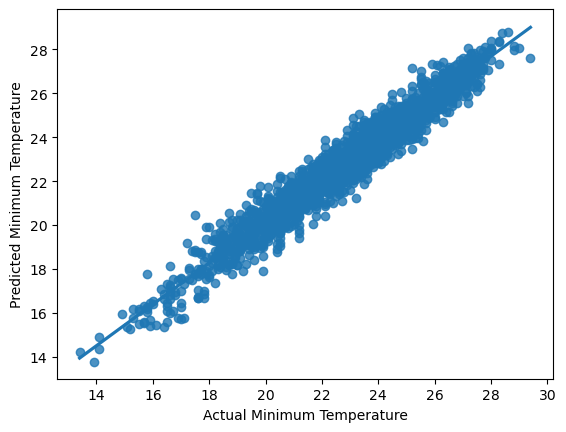

In [77]:
sns.regplot(x=y_test[:],y=load_model.predict(x_test)[:])
plt.xlabel('Actual Minimum Temperature')
plt.ylabel('Predicted Minimum Temperature')